# Time Series: An introduction


## Simulation of Covariance Stationary Stochastic Process
 We will use the simulated series often to study the properties of time series. 

 It is possible to generate density distribution function, cumulative distribution function, quantile function  and random variate generation  from many standard distributions in R. For example the following code generates 10 observartions from an normal distribution:

In [90]:
 x <- rnorm(10) # Generates 10 random observations from normal distributions

 
 let us simulate $Y$ as follows:
 $$Y_t=5+t\varepsilon_t,$$
 $$\varepsilon_t \sim GWN(0,\sigma^2)$$

In [91]:
 y <- numeric(5) # Create a vector with 5 observations
 
 for (i in c(1:5))
 y[i] = 5+i*rnorm(1)
y

 

[1]  7.037574  7.602352  7.270324 -1.906922  1.992466

This section examines the properties of stationary univariate models  using simulated data. The functions used to generate graphs are given in 'Graph.R' script (I will upload a copy in the GitHub repository).


The function **arima.sim()** is used to simulate the series from ARMA(p,q) process of different order. **ARMAacf()** gives the theoretical ACF and PACF. **ARMAtoMA()** gives the impulse response coefficients. I have used these  two functions to generate the graphs of ACF and IRF. See help for details.

### MA(1) process
 Let us start with MA(1) process. The details of AR and MA coefficients need to be specified as arguments in **arima.sim()**. The following codes first define AR  and MA terms and them simulate the process.
 

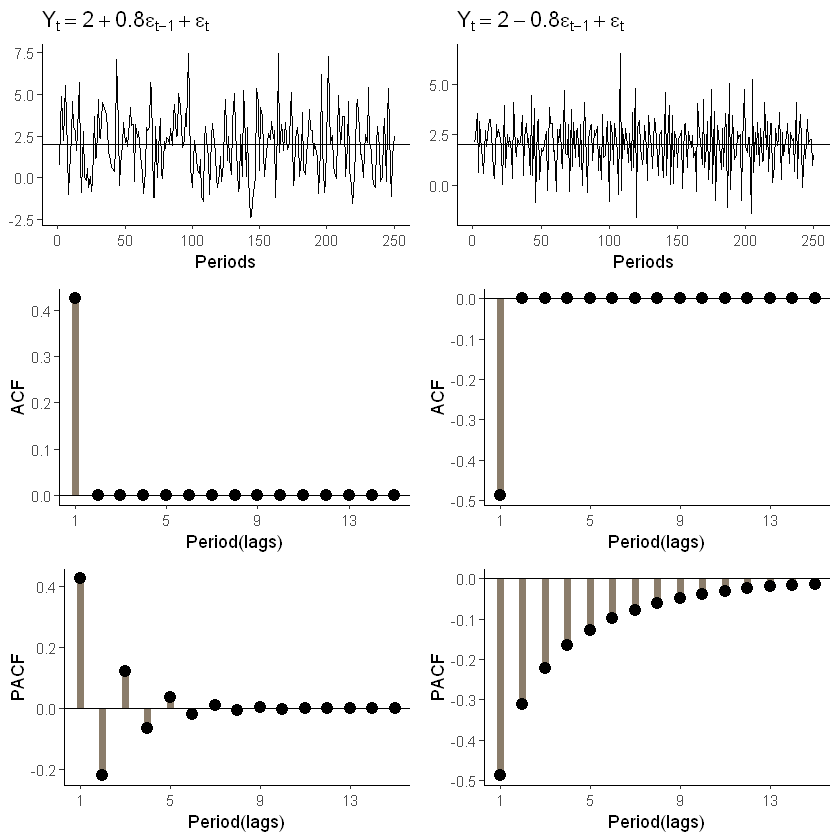

In [92]:
library(grid)
library(gridExtra)
source("graphs.R") #loads the function for graphs

set.seed(123)
ma1 <- 1.8 # define the MA coefficients
ar1 <- 0 # define the AR coefficient
mu <- 2 
model1 <- list(ma=ma1)
s11 <- mu + arima.sim(model=model1,n=250)
# ANother MA model with  coeffient -0.8
ma2 <- -0.8
ar1 <- 0
model2 <- list(ma=ma2)
s12 <- mu + arima.sim(model=model2,n=250)

library(latex2exp)
#ts.graph1() is from graph.R. It plots the time series
gs11 <- ts.graph1(s11)+ ggtitle(TeX("$Y_t=2+0.8 \\epsilon_{t-1}+\\epsilon_{t}$"))
gs12 <-ts.graph1(s12)+ ggtitle(TeX("$Y_t=2-0.8 \\epsilon_{t-1}+\\epsilon_{t}$"))
grid.arrange(gs11,gs12,acf.graph1(ar1,ma1,15),acf.graph1(ar1,ma2,15),pacf.graph1(ar1,ma1,15),pacf.graph1(ar1,ma2,15),ncol=2)

- The plot of $Y_t$ shows that the series is distributed around its mean.
- ACF of MA(1) with 0.8 is positive and cuts off at lag one. PACF oscillates between negative and positive values (Why?).
-  ACF of MA(1) with -0.8 is negative and cuts off at lag one. All the PAC are negative and PACF decays to zero(Why?)
- Both models are invertible. You can get the numerical values of ACF using \texttt{ARMAacf()}. See help for details. (I have customized the graphs using own function sgiven in the sript attached, but you can plot IRF and ACF directly)


### MA(2) Process

In [93]:
set.seed(123)
ma21 <- c(1,0.7) # MA coefficient

mu <- 2
model21 <- list(ma=ma21)
s21 <- mu + arima.sim(model=model21,n=250)

# ANother MA model with  coeffients 1 and -0.25
ma22 <- c(-1.2,0.25)
model22 <- list(ma=ma22)
s22 <- mu + arima.sim(model=model22,n=250)

We have simulated two invertible MA(2) process i.e $Y_{1t}=2+1 \varepsilon_{t-1}+0.7 \varepsilon_{t-2}+\varepsilon_{t}$ and $Y_{2t}=2-1.2 \varepsilon_{t-1}+0.25 \varepsilon_{t-2}+\varepsilon_{t}$. Remember for invertibility the roots of the lag polynomial should be greater than $|1|$ or its inverse should be less than $|1|$. 


#### Invertibility


Consider the **first process** 

$$Y_{1t}=2+1 \varepsilon_{t-1}+0.7 \varepsilon_{t-2}+\varepsilon_{t}$$ 

The roots of lag polynomial($1+1L+0.7L^2)$ are:

In [94]:
maroot <-polyroot(c(1,1,0.7))

#Roots are complex conjugates. Absolute value of these roots are :

abs(maroot) 

[1] 1.195229 1.195229

Plots of both series with ACF and PACF are given below. The first two ACF are non zero for both the process. 

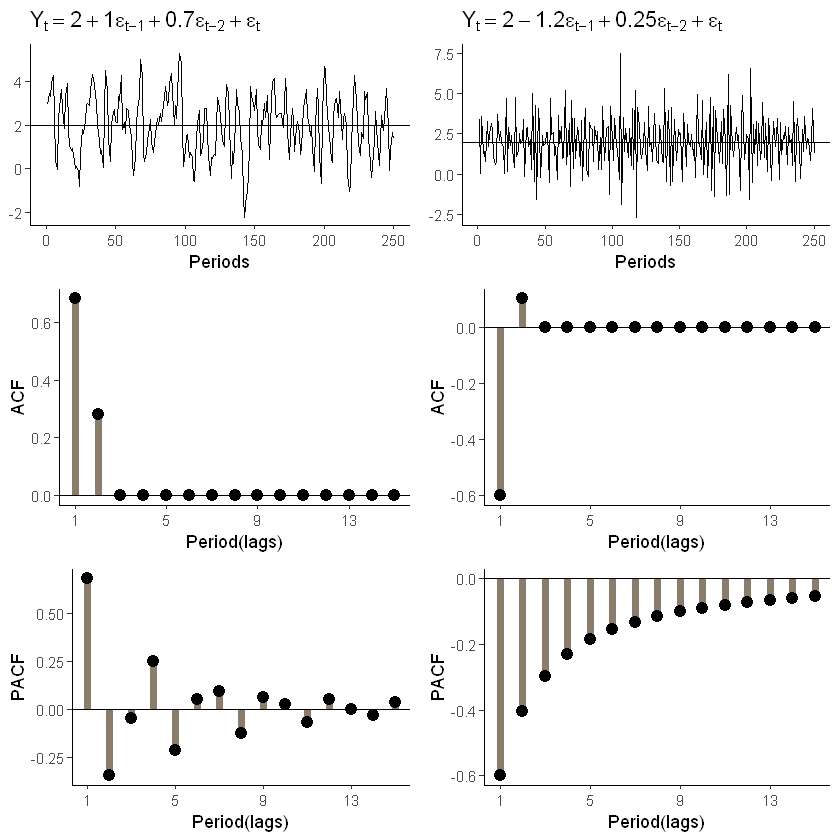

In [95]:
tgs21 <- TeX("$Y_t=2+1\\epsilon_{t-1}+0.7\\epsilon_{t-2}+\\epsilon_{t}$")
gs21 <- ts.graph1(s21)+ ggtitle(tgs21)
tgs22 <- TeX("$Y_t=2-1.2\\epsilon_{t-1}+0.25\\epsilon_{t-2}+\\epsilon_{t}$") 
gs22 <- ts.graph1(s22)+ ggtitle(tgs22)


grid.arrange(gs21,gs22,acf.graph1(ar1,ma21,15),acf.graph1(ar1,ma22,15),pacf.graph1(ar1,ma21,15),pacf.graph1(ar1,ma22,15),ncol=2)

In general:
- ACF can be used to identify order of an MA process
- PACF of an invertible series can exhibit damned decay or cycles depending on the roots of MA lag polynomial.

### AR (1) Process
Three AR(1) models are simulated with 0.8, -0.7 and 0.4 auto regressive coefficient. The impulse responses of AR models are also plotted in this section. 

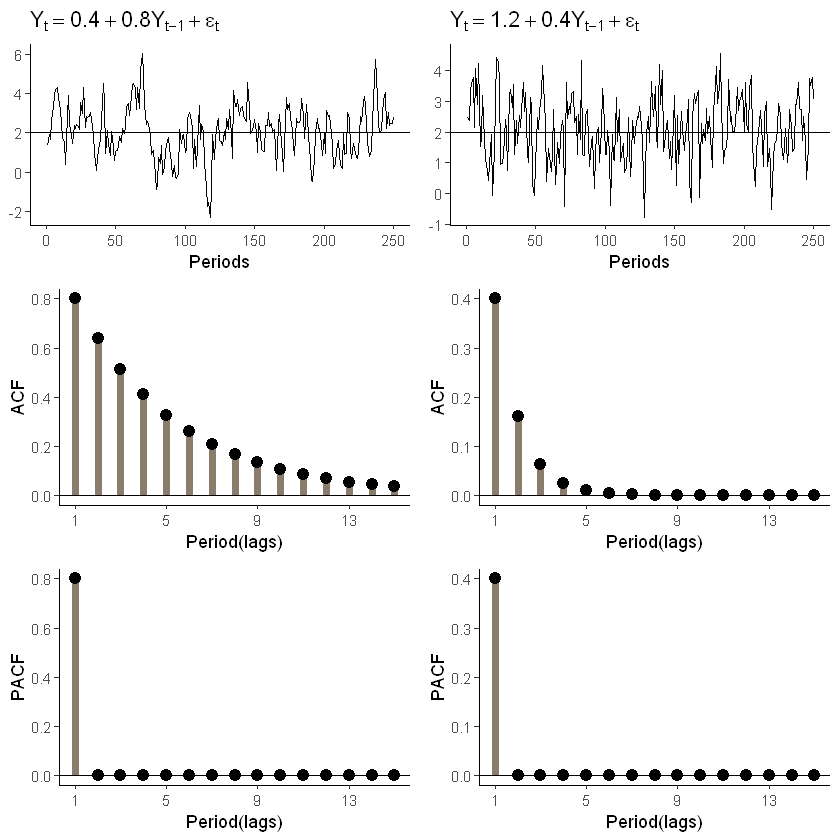

In [96]:
set.seed(123)
ma1 <- 0 # MA coefficient
ar1 <- 0.8 # AR coefficient
mu <- 2
model1 <- list(ma=ma1,ar=ar1)
a11 <- mu + arima.sim(model=model1,n=250)
# ANother AR process with  coeffient 0.4
ar2 <- 0.4
model2 <- list(ma=ma1,ar=ar2)
a12 <- mu + arima.sim(model=model2,n=250)

ga11 <- ts.graph1(a11)+ ggtitle(TeX("$Y_t=0.4+0.8 Y_{t-1}+\\epsilon_{t}$"))
ga12 <-ts.graph1(a12)+ ggtitle(TeX("$Y_t=1.2+0.4 Y_{t-1}+\\epsilon_{t}$"))
grid.arrange(ga11,ga12,acf.graph1(ar1,ma1,15),acf.graph1(ar2,ma1,15),
             pacf.graph1(ar1,ma1,15),pacf.graph1(ar2,ma1,15),ncol=2)

- AR(1) is persistent if the coefficient is close to one.
- Unconditional mean is 2 for all the series
- Convergence of ACF to zero is slower for AR(1) process with 0.8 coefficient.
- The ACF will oscillate between positive and negative values if auto regressive coefficient is negative. See the graph below.
-  AR Process can be identified using PACF. For AR(1)  PACF cut off at lag one.

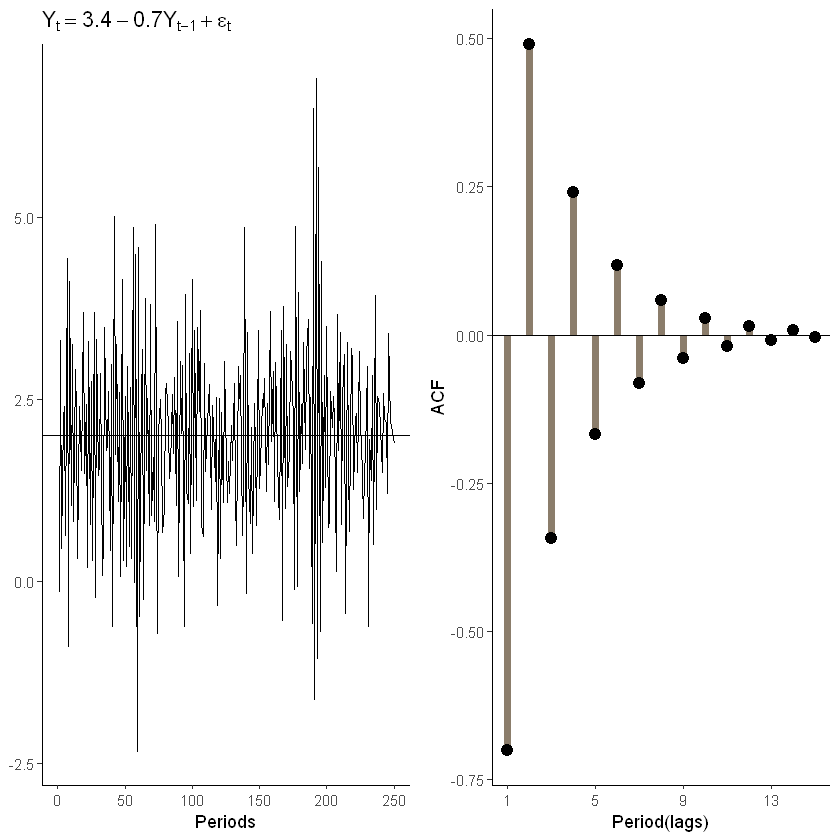

In [97]:
# Process with negative autoregrssive coefficient

ar3 <- -0.7
model3 <- list(ma=ma1,ar=ar3)
a13 <- mu + arima.sim(model=model3,n=250)
ga13 <-ts.graph1(a13)+ ggtitle(TeX("$Y_t=3.4-0.7 Y_{t-1}+\\epsilon_{t}$"))

grid.arrange(ga13,acf.graph1(ar3, ma1,15),ncol=2)

### AR(2) process

Four different models of AR(2) process is considered for simulation


- $Y_t=0.5Y_{t-1}+0.25Y_{t-2}+\varepsilon_t$
- $Y_t=1Y_{t-1}-0.25Y_{t-2}+\varepsilon_t$
- $Y_t=1.5Y_{t-1}-0.75Y_{t-2}+\varepsilon_t$
- $Y_t=-0.6Y_{t-1}+0.2Y_{t-2}+\varepsilon_t$


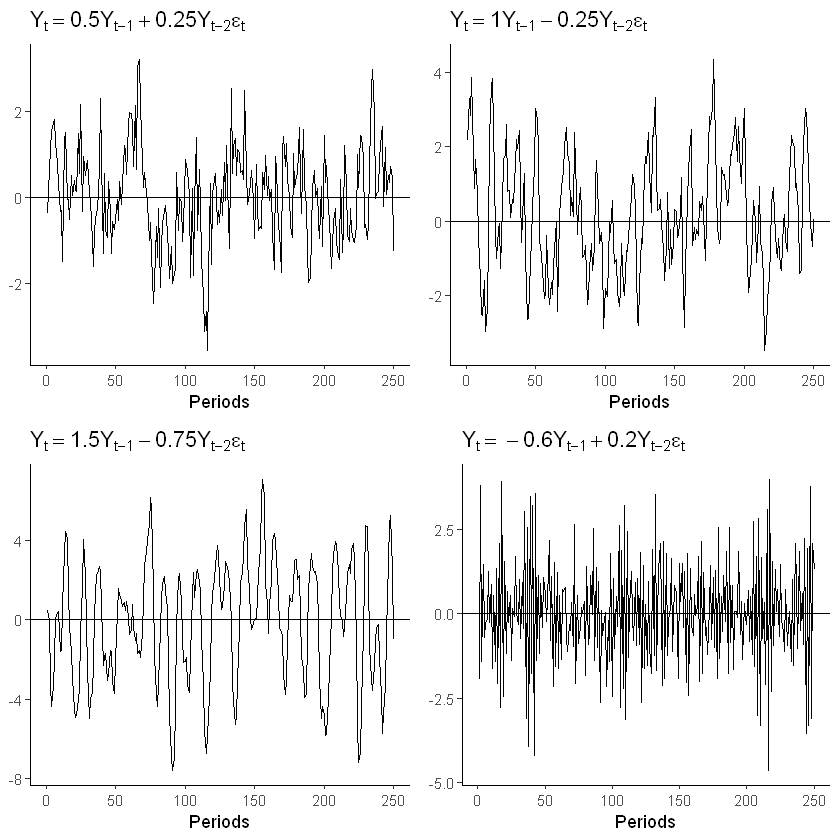

In [98]:

set.seed(123)

ar21 <-c(0.5,0.25)  # AR coefficient
mu <- 0
model21 <- list(ar=ar21)
a21 <- mu + arima.sim(model=model21,n=250)
# ANother AR model with  coeffients 1 and -0.25
ar22 <- c(1,-0.25)
model22 <- list(ar=ar22,ma=ma1)
a22 <- mu + arima.sim(model=model22,n=250)

# ANother AR model with  coeffients 1.5 and -0.75
ar23 <- c(1.5,-0.75)
model23 <- list(ma=ma1,ar=ar23)
a23 <- mu + arima.sim(model=model23,n=250)

# ANother AR model with  coeffients -.6 and -0.2
ar24 <- c(-.6,0.2)
model24 <- list(ma=ma1,ar=ar24)
a24 <- mu + arima.sim(model=model24,n=250)

ga24 <-ts.graph1(a24)+ ggtitle(TeX("$Y_t=-0.6 Y_{t-1}+0.2Y_{t-2}\\epsilon_{t}$"))
ga23 <-ts.graph1(a23)+ ggtitle(TeX("$Y_t=1.5 Y_{t-1}-0.75Y_{t-2}\\epsilon_{t}$"))
ga21 <-ts.graph1(a21)+ ggtitle(TeX("$Y_t=0.5 Y_{t-1}+0.25Y_{t-2}\\epsilon_{t}$"))
ga22 <-ts.graph1(a22)+ ggtitle(TeX("$Y_t=1 Y_{t-1}-0.25Y_{t-2}\\epsilon_{t}$"))
grid.arrange(ga21,ga22,ga23,ga24,ncol=2)

In [99]:
ma1 <-0
acf24 <-acf.graph1(ar24,ma1,15)+ ggtitle(TeX("$Y_t=-0.6 Y_{t-1}+0.2Y_{t-2}\\epsilon_{t}$"))
acf23 <-acf.graph1(ar23,ma1,15)+ ggtitle(TeX("$Y_t=1.5 Y_{t-1}-0.75Y_{t-2}\\epsilon_{t}$"))
acf21 <-acf.graph1(ar21,ma1,15)+ ggtitle(TeX("$Y_t=0.5 Y_{t-1}+0.25Y_{t-2}\\epsilon_{t}$"))
acf22 <-acf.graph1(ar22,ma1,15)+ ggtitle(TeX("$Y_t=1 Y_{t-1}-0.25Y_{t-2}\\epsilon_{t}$"))

- The  autocorrelation decays and asympotically approches zero. The shape and magnitute of the ACF depends on the roots of $F$ matrix. (The discussion on this is beoyond the scope of our course)

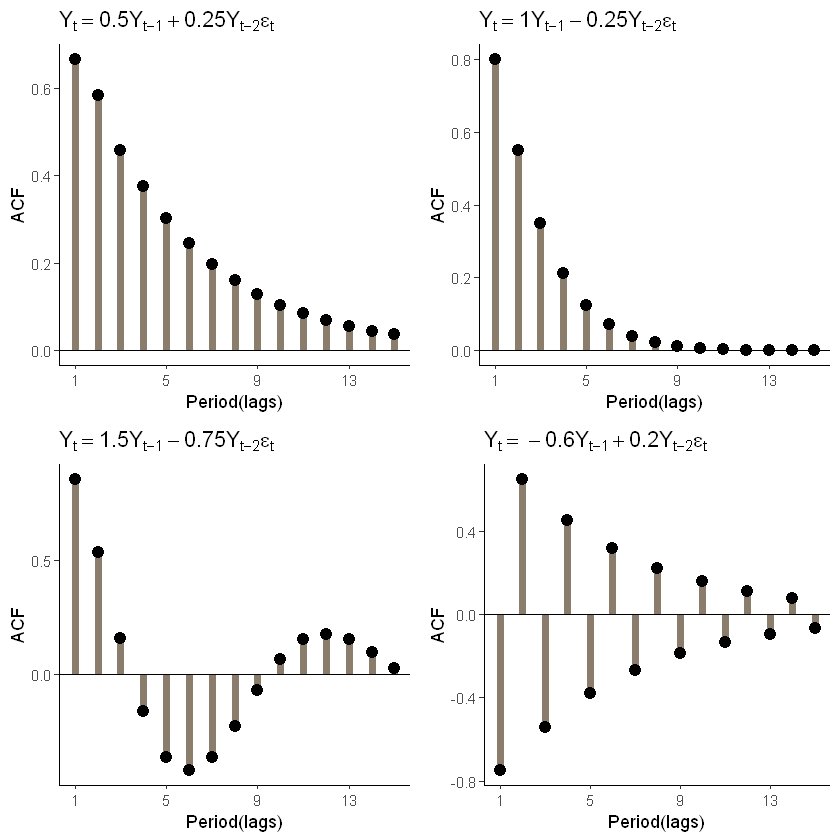

In [100]:
grid.arrange(acf21,acf22,acf23,acf24)

- Order of the AR process can be identified using PACF
- PACF cuts off at lag p for an AR(p) process.
- The teortical PACF of the AR(2) process is given below:

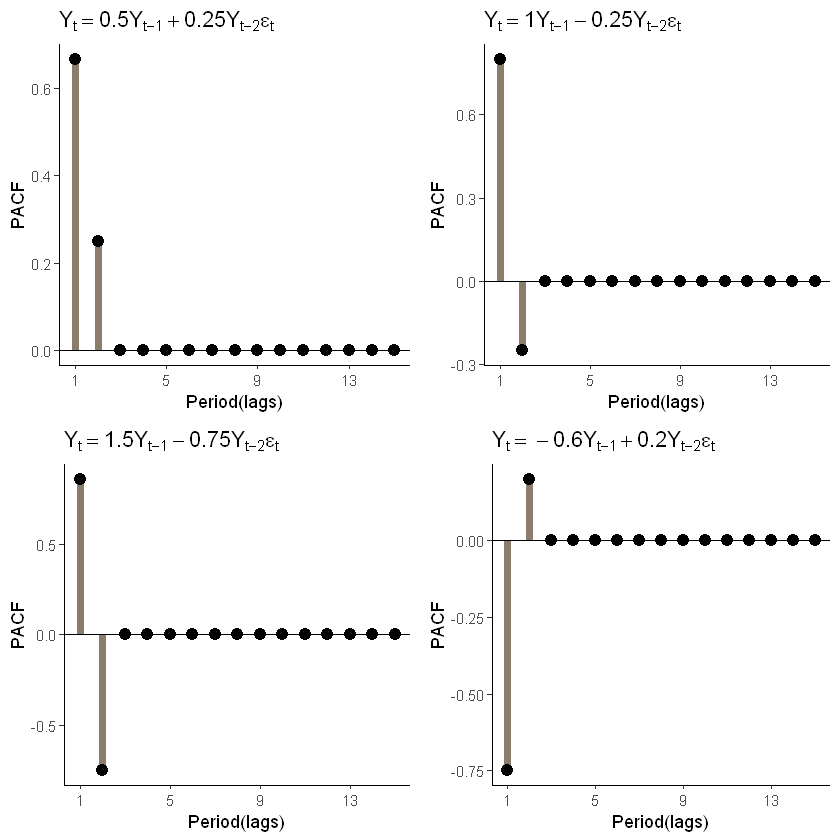

In [101]:
pacf24 <-pacf.graph1(ar24,ma1,15)+ ggtitle(TeX("$Y_t=-0.6 Y_{t-1}+0.2Y_{t-2}\\epsilon_{t}$"))
pacf23 <-pacf.graph1(ar23,ma1,15)+ ggtitle(TeX("$Y_t=1.5 Y_{t-1}-0.75Y_{t-2}\\epsilon_{t}$"))
pacf21 <-pacf.graph1(ar21,ma1,15)+ ggtitle(TeX("$Y_t=0.5 Y_{t-1}+0.25Y_{t-2}\\epsilon_{t}$"))
pacf22 <-pacf.graph1(ar22,ma1,15)+ ggtitle(TeX("$Y_t=1 Y_{t-1}-0.25Y_{t-2}\\epsilon_{t}$"))

grid.arrange(pacf21,pacf22,pacf23,pacf24)

#### Stationarity
Let us consider an AR(p) model $$Y_{t} =\phi _{1}Y_{t-1}+\phi _{2}Y_{t-2}
...+\phi _{p}Y_{t-p}+\varepsilon _{t}$$ 
using lag operator  the AR(p) process as follows:
$$(1-\phi_1L-\phi_2L^2-...-\phi_pL^p)Y_t=\phi_0+\varepsilon_t$$
The AR(p) processis staionary if the roots of $(1-\phi_1L-\phi_2L^2-...-\phi_pL^p)$ is less than modulud 1. Alternatively we can express AR(p) process in matrix form as follows

$$\mathbf{Z_t=F Z_{t-1}+v_t}$$
i.e,




$$
\begin{bmatrix}
Y_{t} \\ 
Y_{t-1} \\ 
Y_{t-2} \\ 
\vdots \\ 
Y_{t-p+1}%
\end{bmatrix}%
=%
\begin{bmatrix}
\phi _{1} & \phi _{2} & \cdots & \phi_{p-1} & \phi _{p} \\ 
1 & 0 & \cdots & \cdots & 0 \\ 
0 & 1 & \cdots & \cdots & 0 \\ 
\vdots & \vdots & \cdots & \cdots & \vdots \\ 
0 & 0 & \cdots & 1 & 0%
\end{bmatrix}%
\begin{bmatrix}
Y_{t-1} \\ 
Y_{t-2} \\ 
Y_{t-3} \\ 
\vdots \\ 
Y_{t-p}%
\end{bmatrix}%
+%
\begin{bmatrix}
\varepsilon _{t} \\ 
0 \\ 
0 \\ 
\vdots \\ 
0%
\end{bmatrix}%
$$


and check the stationarity based on the roots of $F$ matrix. if the $Y_t$ is covariance stationary then asll the eigen values of $F$ will be less than modulus one.

We will check the stationarity of AR(2) process using eigen values of $F$ matrix,where $F=\begin{bmatrix} \phi_1 &\phi_2\\1&0\end{bmatrix}$ form the matrix form of AR(2) $\mathbf{Z_t=F Z_{t-1}+v_t}$.  You may check the roots of AR lag polynomial using **polyroot()**. Eigen values of all the four models are given below.

**Model1**:$Y_t=0.5Y_{t-1}+0.25Y_{t-2}+\varepsilon_t$

In [102]:
(ar21F <- rbind(ar21,c(1,0)))#F matrix

ar21,0.5,0.25
,1.0,0.00


In [103]:
(ar21r <- eigen(ar21F)$values)#Eigen Values

[1]  0.809017 -0.309017

In [104]:
abs(ar21r) #Abs of eigen values

[1] 0.809017 0.309017

**Model2**: $Y_t=1Y_{t-1}-0.25Y_{t-2}+\varepsilon_t$

In [105]:
#F matrix
(ar22F <- rbind(ar22,c(1,0)))

ar22,1,-0.25
,1,0.00


In [106]:
#Eigen Values

(ar22r <- eigen(ar22F)$values)

[1] 0.5 0.5

In [107]:
#Abs of eigen values
abs(ar22r)

[1] 0.5 0.5

** Model3** $Y_t=1.5Y_{t-1}-0.75Y_{t-2}+\varepsilon_t$

In [108]:
#F matrix
(ar23F <- rbind(ar23,c(1,0)))

ar23,1.5,-0.75
,1.0,0.00


In [109]:
#Eigen Values

(ar23r <- eigen(ar23F)$values)

[1] 0.75+0.4330127i 0.75-0.4330127i

In [110]:
#Abs of eigen values
abs(ar23r)

[1] 0.8660254 0.8660254

**Model4**: $Y_t=-0.6Y_{t-1}+0.2Y_{t-2}+\varepsilon_t$

In [111]:
#F matrix
(ar24F <- rbind(ar24,c(1,0)))

ar24,-0.6,0.2
,1.0,0.0


In [112]:
#Eigen Values

(ar24r <- eigen(ar24F)$values)

[1] -0.8385165  0.2385165

In [113]:
#Abs of eigen values
abs(ar24r)

[1] 0.8385165 0.2385165

We can represent the stationary condition graphically as follows.

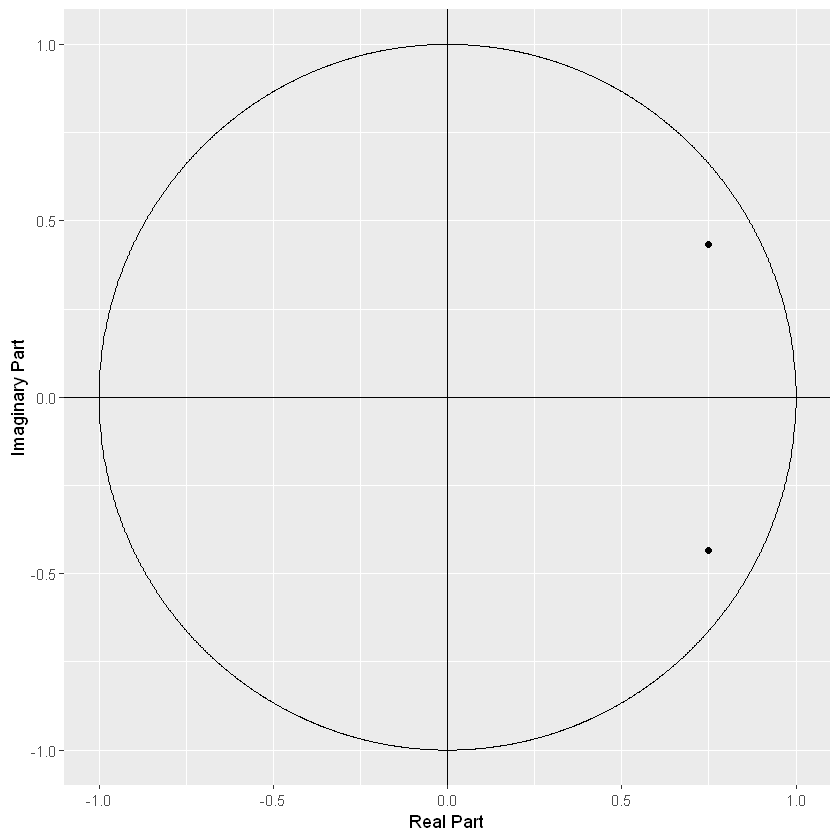

In [114]:
x <- seq(-1,1,length=1000)
y1 <- sqrt(1 - x^2)
y2 <- -sqrt(1 - x^2)
unitCircle <- ggplot(data.frame(x=x,y1=y1,y2=y2)) + #Using the results from earlier
        geom_hline(aes(yintercept=0)) +
        geom_vline(aes(xintercept=0)) +
        geom_line(aes(x=x,y=y1)) + # top of circle
        geom_line(aes(x=x,y=y2)) + # bottom of circle
        geom_point(aes(x=Real, y=Imaginary), 
                   data.frame(Real=Re(ar23r), # Using the same code as above
                              Imaginary=Im(ar23r))) +
        scale_y_continuous("Imaginary Part", limits=c(-1,1)) +

                        scale_x_continuous("Real Part", limits=c(-1,1))
unitCircle
        

All the series we considered here are stationary since the eigen values as less than $|1|$.

As we have discussed already any co-variance stationary AR(P) process say $\Phi(L)Y_t=\varepsilon_t$ can be written as  $MA(\infty)$ process,i.e., $Y_t=\Psi(L)\varepsilon_t$.
The coefficients in $\Psi(L)=1+\psi_1L+\psi_2L^2+\ldots$ are known as Impulse response function. 

### ARMA Process

An ARMA model is simulated as follows: $Y_t=-0.6Y_{t-1}+0.2Y_{t-2}-1.20\varepsilon_{t-1}+0.25\varepsilon_{t-2}+\varepsilon_{t}$


The invertibility of ARMA process depends on roots of MA lag polynomial and stationarity on AR lag polynomial. I am using the AR and MA coefficients that we used to simulate  AR and MA process earlier. You may cross check.

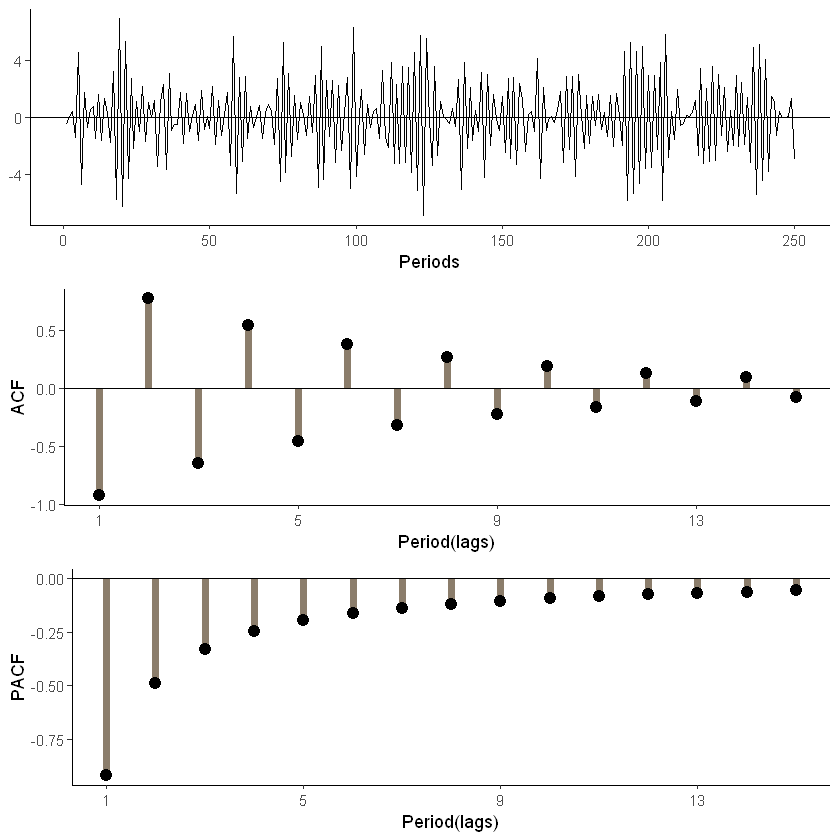

In [115]:
set.seed(123)
ma11.1 <- ma22 # define the MA coefficients
ar11.1 <- ar24 # define the AR coefficient
mu <- 0
model1 <- list(ma=ma11.1,ar=ar11.1)
s11.1 <- mu + arima.sim(model=model1,n=250)

grid.arrange(ts.graph1(s11.1),acf.graph1(ar11.1, ma11.1,15),pacf.graph1(ar11.1,ma11.1,15),ncol=1)

- PACF of an ARMA(p,q) process will behave like a PACF of MA(q) process after lag q, and ACF like AR(p) process after lag p.


## A Model of the interest rate spread:An illustration of Box Jenkins Methodology in R

This example is a reproduction from Walter Enders ($4^{th}$ Edition). Chapter 2 Section 10 (pp 88). The estimated values may differ slightly.
 Quarterly data from 1960Q1 to 2012Q4 on interest rate spread (Difference between the interest rate on 5-year U.S. government bonds(R5) and the rate on 3-month treasury bills(TBILL)). 

- R5 and TBILL are given in the  data file named QUARTERLY. (File has a sas7bdat extension. Use **read.sas7bdat()** to load the file.)
-   The graph of spread is given below.
### Model specification
Always examine the time series visually before starting the analysis

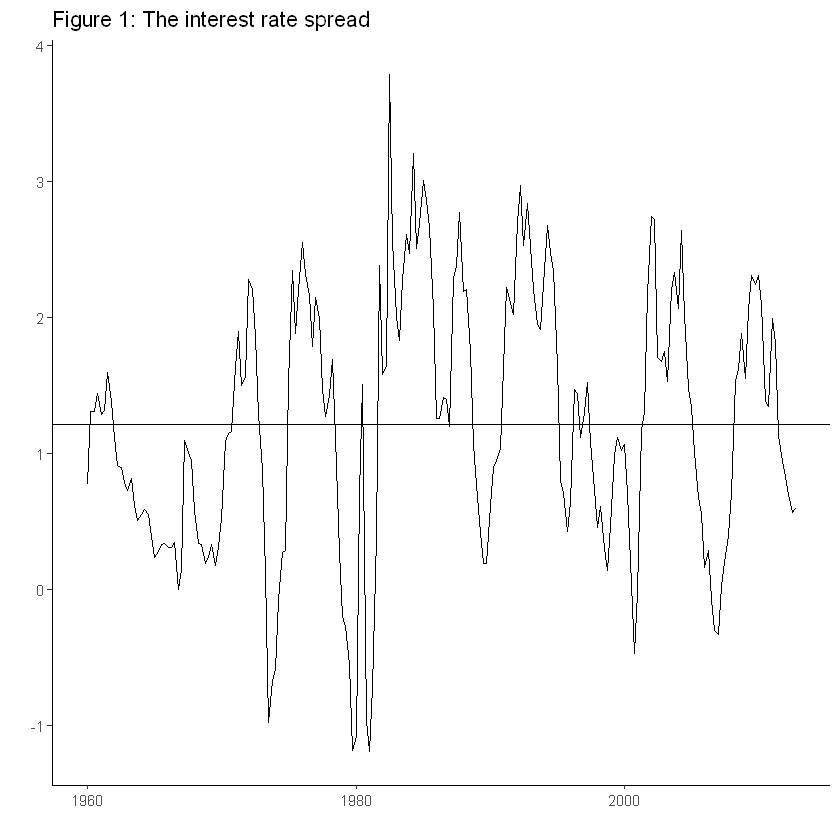

In [116]:
library("sas7bdat")

data1 <- read.sas7bdat("quarterly.sas7bdat")

sp <- data1$r5-data1$Tbill
sp <- ts(sp,start=c(1960,1),freq=4)
mu <- mean(sp)


df <- data.frame(date=as.Date(as.yearqtr(time(sp))),Y=as.matrix(sp))

tssp <- ggplot(data=df, mapping=aes(x=date, y=Y))+geom_line()+theme_classic()+ggtitle("Figure 1: The interest rate spread") +
  xlab("") + ylab("")+geom_hline(yintercept=mu)

tssp

Following inferences can be drawn from the plot:

-  The series seems to be persistent
-  No visible breaks in mean or variance of the series
-  Looking into the graph the sequence seems to be a covariance stationary process.

 
We can check the stationarity using unit root test (Yet to discuss). 


Next step is to identity tentative model for the process. We can make initial guess by checking ACF and PACF. Plots of the ACF and PACF are given in figure 2 and 3 (95% confidence interval is by red dashed lines). 95% confidence intervals are:

In [117]:
2/sqrt(length(sp))
-2/sqrt(length(sp))

[1] 0.1373606

[1] -0.1373606

The joint significance of autocorrelation can be examined using Ljung Box Q statistics. For example the following code computes joint significance of first two autocorrelations.

In [118]:
Box.test(sp,lag=2,type="Ljung-Box")


	Box-Ljung test

data:  sp
X-squared = 256.67, df = 2, p-value < 2.2e-16


The first 12 Q statistics along with the numerical values of ACF and PACF  are given below

In [119]:

#ACF
sacf <- acf(sp,plot=F,10)
#PACF
spacf <- pacf(sp,plot=F,10)
df1 <-as.matrix(rbind(ACF=sacf$acf[2:11],PACF=spacf$acf))
 
#Ljung Box Q stat

Mjb <- matrix(nrow=2, ncol=10)
for(i in 1:10){
        jb <- Box.test(sp, lag=i, type="Ljung-Box")
        round(Mjb[1,i] <- jb$statistic,2)
        round(Mjb[2,i] <- jb$p.value,2)
}

dimnames(Mjb) <- list(c("Q-stat","pval"))

# Combine ACF and Qstat                                                                                             

dimnames(df1) = list(c("ACF","PACF"), as.character(1:10))
df1 <- rbind(df1,Mjb)
round(df1,2)

,1,2,3,4,5,6,7,8,9,10
ACF,0.86,0.68,0.55,0.41,0.28,0.15,0.07,0.04,-0.03,-0.13
PACF,0.86,-0.21,0.11,-0.18,-0.01,-0.14,0.14,0.01,-0.18,-0.12
Q-stat,157.69,256.67,322.03,358.66,375.68,380.57,381.69,382.04,382.27,385.90
pval,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


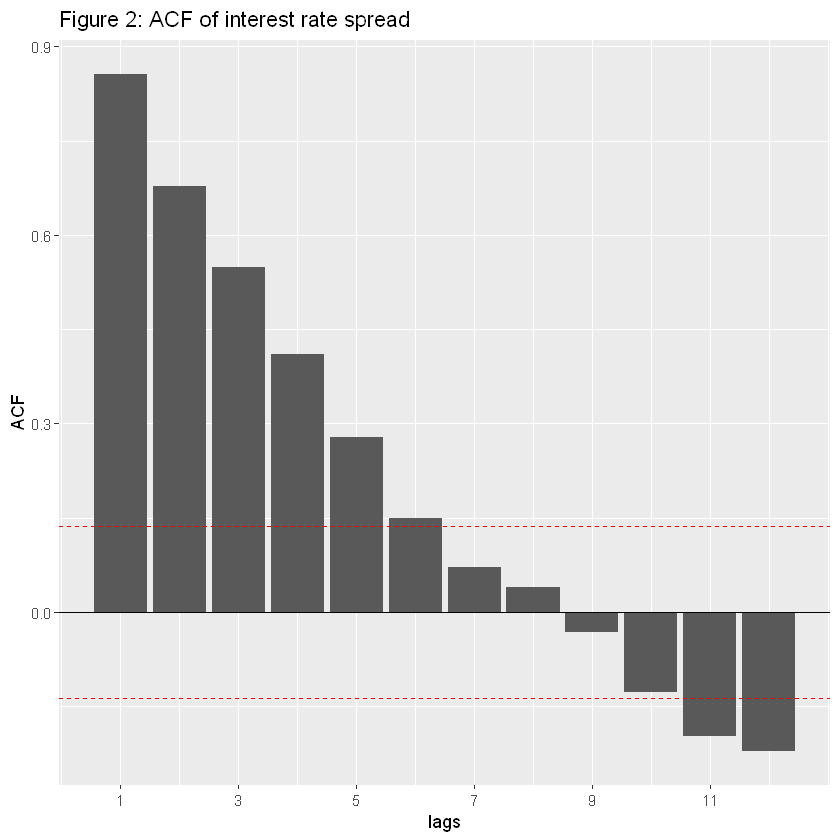

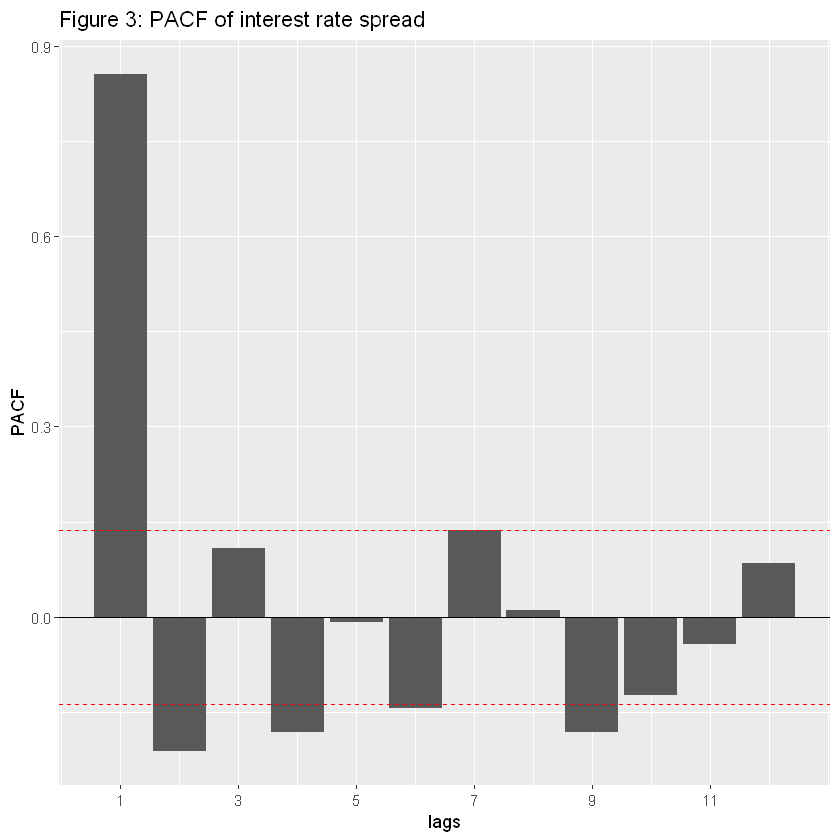

In [120]:
sacf.graph1(sp,12)+ggtitle("Figure 2: ACF of interest rate spread")
spacf.graph1(sp,12)+ggtitle("Figure 3: PACF of interest rate spread")

-  The ACF and PACF converge to zero quickly enough that we do not have to worry about a time-varying mean. 
-  Recall that the theoretical ACF of a pure MA(q) process cuts off to zero at lag q. Plot of the ACF don't exhibit such a behavior hence possibility of pure MA(q) process can be eliminated.
- Theoretical ACF of an AR(1)model decays geometrically.Examination of numerical values of ACF rules out this possibility too.
-  The estimated values of the PACF are such that $\phi_{11} = 0.86, \phi_{22} = -0.21,\phi_{33} = 0.11,$ and $\phi_{44} = -0.18.$ Although $\phi_{55}$ is close to zero, $\phi_{66} = -0.15$ and $\phi_{77} = 0.14.$ It is clear from the figure that $\phi_{11} = 0.86, \phi_{22} = -0.21, \phi_{44} = -0.18,\phi_{66} = -0.15$ and $\phi_{77} = 0.14.$ are statistically different from zero.In a pure AR(p) model, the PACF cuts to zero after lag p. Hence, if the  series follows a pure AR(p) process, the value of p could be as high as six or seven.
-  There appears to be an oscillating pattern in the PACF in that the first seven values alternate in sign. Oscillating decay of the PACF is characteristic of a positive MA coefficient (Cycles?).
- Due to the number of small and marginally significant coefficients, the ACF and PACF of the spread are probably more ambiguous.
-  Examining the PACF and ACF we can think of an AR(7) or ARMA(1,1) Process. Let us start with AR(7).
 

### Estimation: First model

In [121]:
library(forecast)

mar7 <- Arima(sp,order=c(7,0,0)) 
# specify the order in order arg.
#First value stands for number of AR terms, 
#second the order of integration and third for MA terms.

#Pvalues of ARIMA
p_mar7 <- (1-pnorm(abs(mar7$coef)/sqrt(diag(mar7$var.coef))))*1.96
### presenting the results with p values
df_mar7 <-as.matrix(rbind(mar7$coef,p_mar7))

dimnames(df_mar7) = list(c("Coefficients","P Value"),c("AR1","AR2","AR3","AR4","AR5","AR6","AR7","mu"))
round(df_mar7,2)

,AR1,AR2,AR3,AR4,AR5,AR6,AR7,mu
Coefficients,1.11,-0.44,0.39,-0.29,0.22,-0.29,0.13,1.2
P Value,0.00,0.00,0.00,0.01,0.04,0.00,0.05,0.0


#### Diagnostic Checking: AR(7)

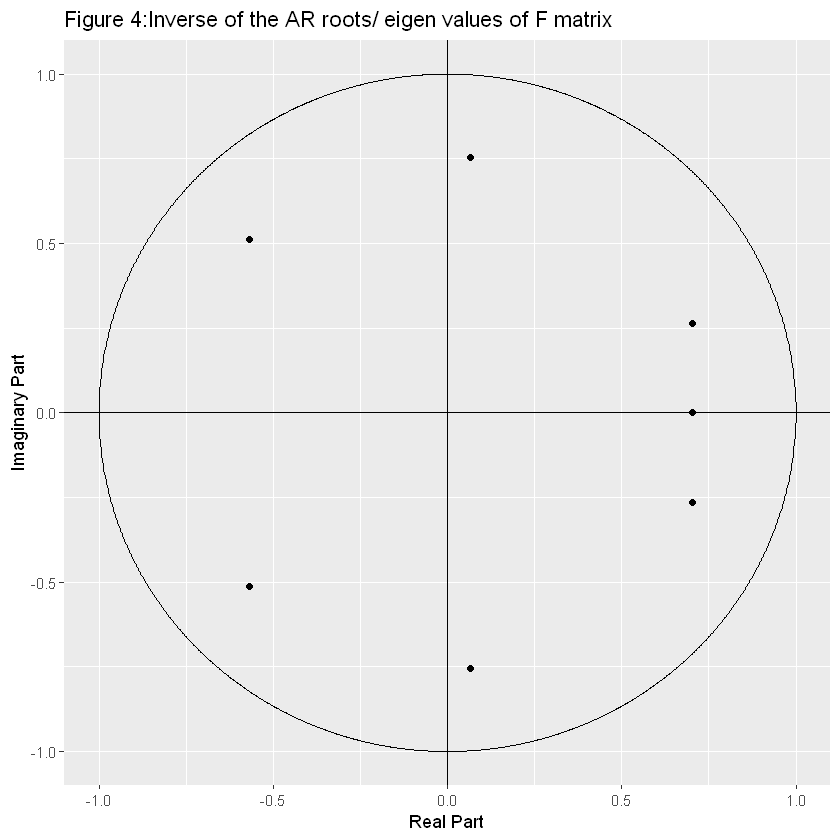

In [122]:
car7 <- mar7$coef[1:7]
rar7 <- (polyroot(c(1,-car7)))^{-1}

roots_arma(rar7)+ggtitle("Figure 4:Inverse of the AR roots/ eigen values of F matrix")

 The model is stable and stationary since all the eigen values are inside the unit circle.



-  All the coefficients are statistically significant at 5% level except AR(7)
-  R reports the unconditional mean in the estimation (mu). You can easily find out the intercept using the formula for $\mu$.
-  Next, we need to check the properties of residuals using ACF, PACF and Q
-  Plots of ACF, PACF and estimates of Q stat of residuals are given below.

 

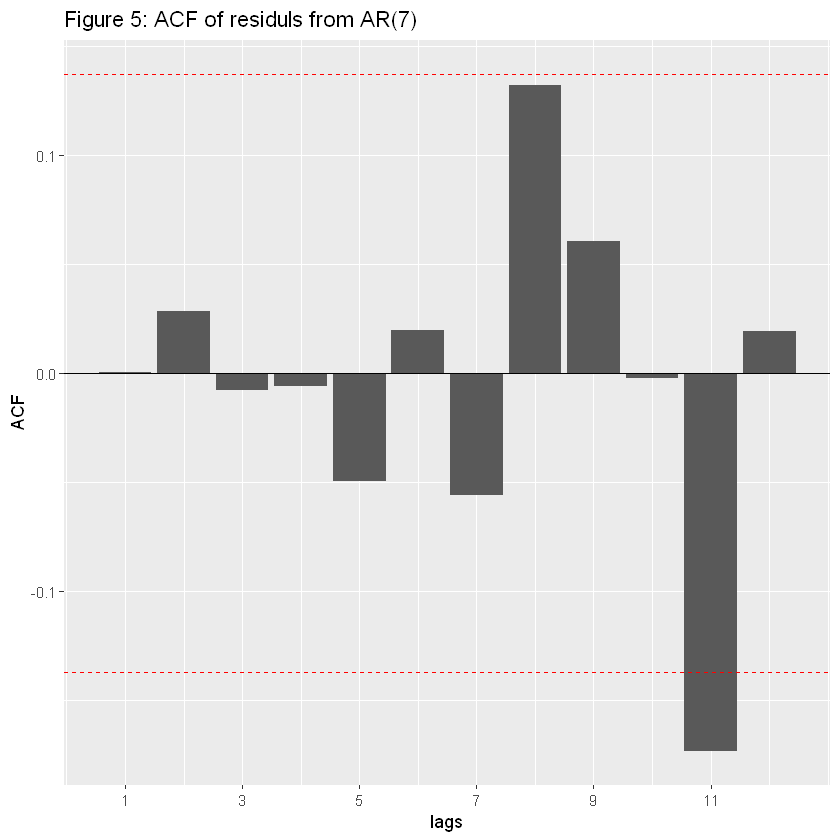

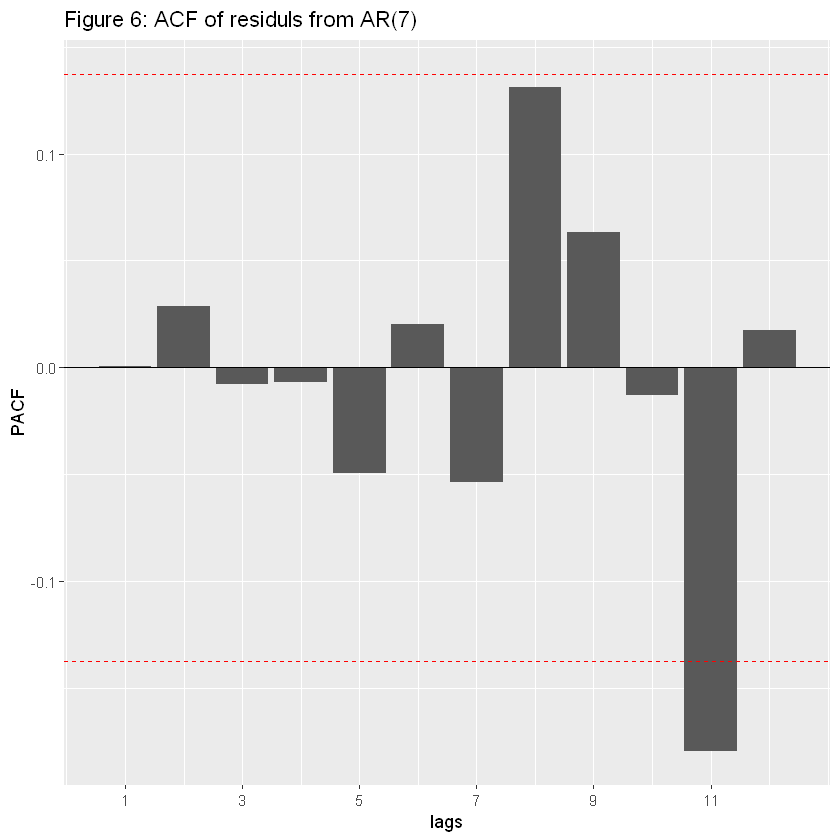

In [123]:
res_ar7 <- mar7$residuals
sacf.graph1(res_ar7,12)+ggtitle("Figure 5: ACF of residuls from AR(7)")
spacf.graph1(res_ar7,12)+ggtitle("Figure 6: ACF of residuls from AR(7)")

In [124]:
#Ljung Box Q stat

Mjb <- matrix(nrow=2, ncol=12)
for(i in 1:12){
        jb <- Box.test(res_ar7, lag=i, type="Ljung-Box")
        round(Mjb[1,i] <- jb$statistic,2)
        round(Mjb[2,i] <- jb$p.value,2)
}

#Ljung Box Q statistics for residuals of AR(7)
dimnames(Mjb) <- list(c("Q-stat","pval"))
 round(Mjb,2)

Q-stat,0.00,0.18,0.19,0.2,0.74,0.83,1.52,5.40,6.22,6.22,13.02,13.11
pval,0.99,0.92,0.98,1.0,0.98,0.99,0.98,0.71,0.72,0.80,0.29,0.36


-  Plot of ACF and PACF of residuals indicate presence of autocorrelation at lag 11.To confirm it we can check Q stat.
-  The significance levels of the Q-statistics  indicate no remaining autocorrelation in the residuals. Hence there is no need to account for the autocorrelation at lag 11.
-  Although the AR(7) model has some desirable attributes, one reasonable estimation strategy is to eliminate the seventh lag and estimate an AR(6) model over the same sample period. 
 
### Second Attempt: AR(6)
Note that the data set begins in 1960Q1, so that with seven lags the estimation of the AR(7) begins in 1961Q4. For comparable results we will estimate AR(6) for the same sample

In [125]:

sp1 <-window(sp,start=c(1960,2))

mar6 <- Arima(sp1,order=c(6,0,0)) 

#Pvalues of ARIMA
p_mar6 <- (1-pnorm(abs(mar6$coef)/sqrt(diag(mar6$var.coef))))*1.96
# presenting the results with p values
df_mar6 <-as.matrix(rbind(mar6$coef,p_mar6))

dimnames(df_mar6) = list(c("Coefficients","P Value"),c("AR1","AR2","AR3","AR4","AR5","AR6","mu"))

round(df_mar6,2)

,AR1,AR2,AR3,AR4,AR5,AR6,mu
Coefficients,1.09,-0.42,0.36,-0.24,0.16,-0.14,1.21
P Value,0.00,0.00,0.00,0.02,0.11,0.03,0.00


#### Diagnostic Checking: AR(6)

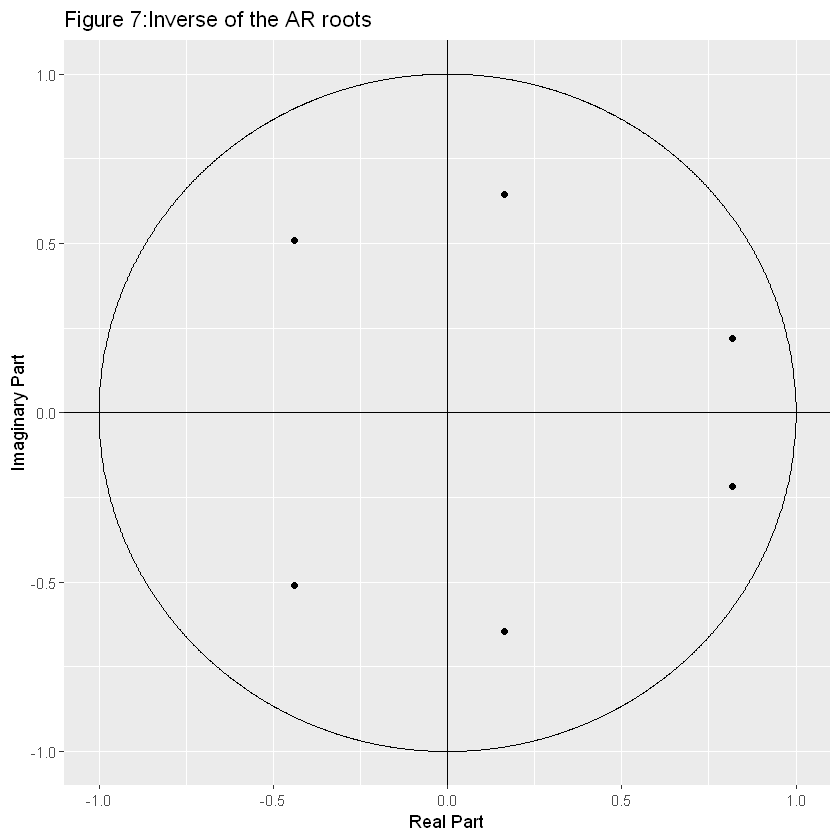

In [126]:
car6 <- mar6$coef[1:6]
rar6 <- (polyroot(c(1,-car6)))^{-1}

roots_arma(rar6)+ggtitle("Figure 7:Inverse of the AR roots")

In [127]:
#Ljung Box Q stat
res_ar6 <- mar6$residuals
Mjb <- matrix(nrow=2, ncol=12)
for(i in 1:12){
        jb <- Box.test(res_ar6, lag=i, type="Ljung-Box")
        round(Mjb[1,i] <- jb$statistic,2)
        round(Mjb[2,i] <- jb$p.value,2)
}

dimnames(Mjb) <- list(c("Q-stat","pval"))

round(Mjb,2)

Q-stat,0.13,0.13,0.13,0.31,0.34,2.08,2.73,10.73,12.03,12.14,16.03,16.39
pval,0.72,0.94,0.99,0.99,1.00,0.91,0.91,0.22,0.21,0.28,0.14,0.17


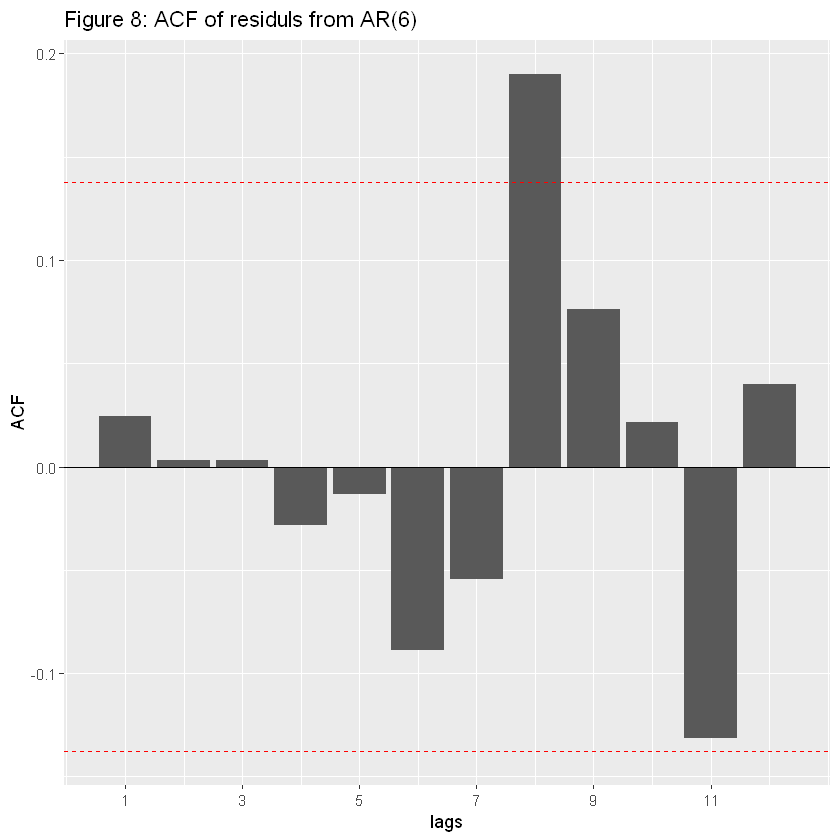

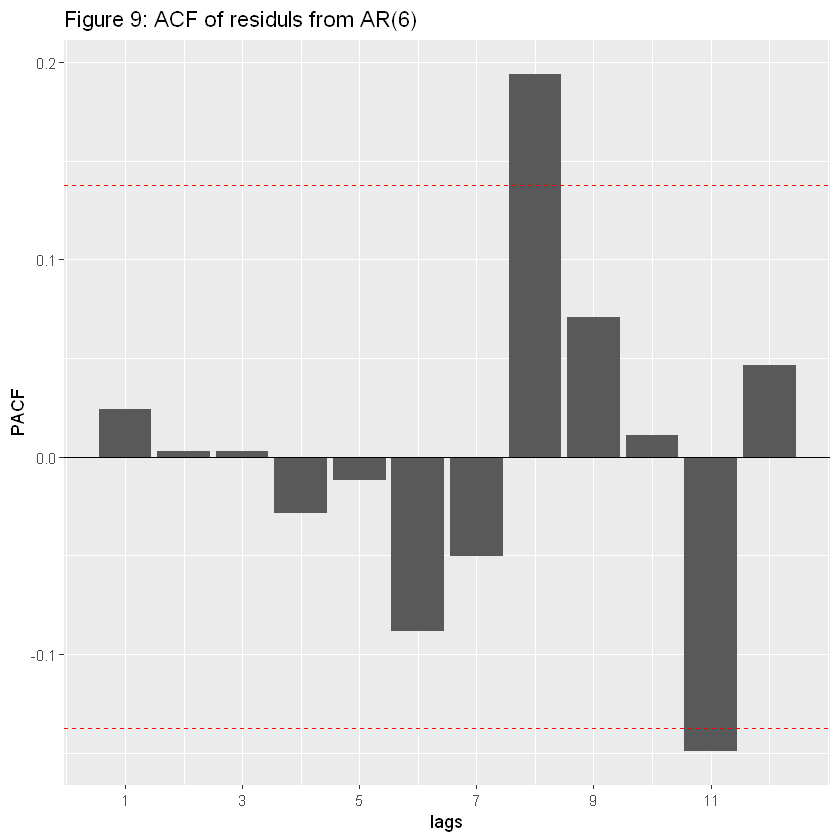

In [128]:
sacf.graph1(res_ar6,12)+ggtitle("Figure 8: ACF of residuls from AR(6)")
spacf.graph1(res_ar6,12)+ggtitle("Figure 9: ACF of residuls from AR(6)")

-  Although there is autocorrelations in  the residuals at some lags the Q-statistics fail to  reject the null of no autocorrelation at all lags.
-  Although AR5 appears to be statistically insignificant, it is generally
not a good idea to use t-statistics to eliminate intermediate lags. As such, most
researchers would not eliminate the fifth lag and estimate a model with lags 1 through
4 and lag 6. Recall that the appropriate use of a t-statistic requires that regressor in question be uncorrelated with the other regressors. (But you can try. If you get a better  model you can use it. )
-  The overall result is that the diagnostic checks of the AR(6) model suggests that it is adequate.
We can compare these two  models using AIC and SBC criteria
 

In [129]:
mar7$aic # AIC for AR(7)

[1] 289.3214

In [130]:
mar6$aic  #AIC for AR(6)

[1] 289.5437

In [131]:
mar7$bic # SBC for AR(7)

[1] 319.5307

In [132]:
mar6$bic #  SBC for AR(6)

[1] 316.3586

 Thus the AIC selects the AR(7) model, whereas the SBC selects
the more parsimonious AR(6) model.

Let us try a very parsimonious model and estimate an AR(2).
### Third Attempt: AR(2)

In [133]:
sp2 <-window(sp,start=c(1961,2))

mar2 <- Arima(sp1,order=c(2,0,0)) 

#Pvalues of ARIMA
p_mar2 <- (1-pnorm(abs(mar2$coef)/sqrt(diag(mar2$var.coef))))*1.96
### presenting the results with p values
df_mar2 <-as.matrix(rbind(mar2$coef,p_mar2))

dimnames(df_mar2) = list(c("Coefficients","P Value"),c("AR1","AR2","mu"))

round(df_mar2,2)

,AR1,AR2,mu
Coefficients,1.04,-0.22,1.21
P Value,0.00,0.00,0.00


#### Diagnostic Checking: AR(2)

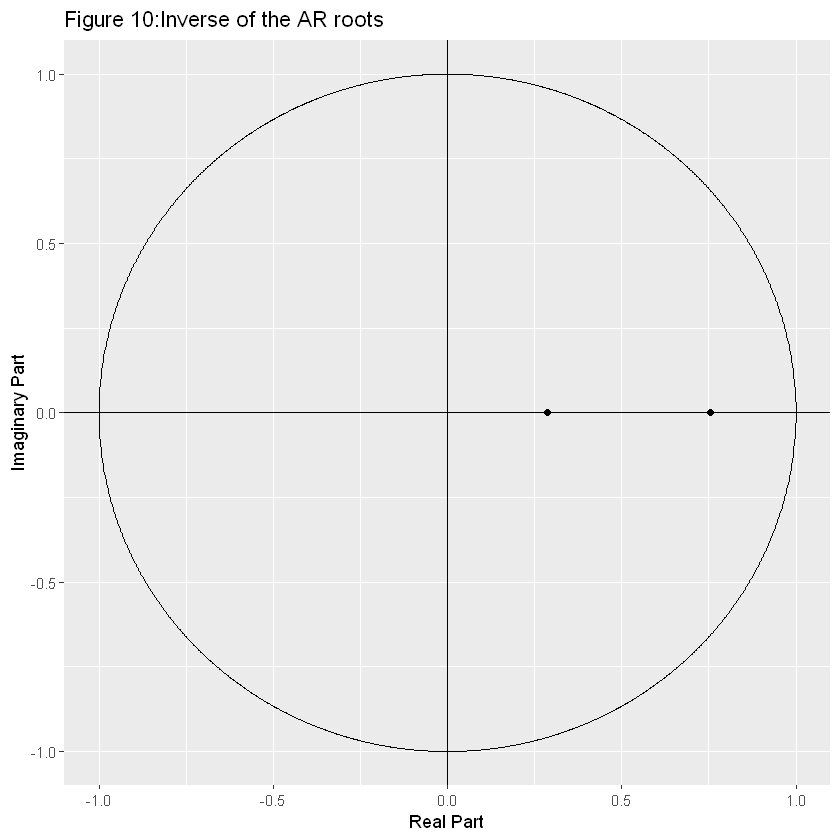

In [134]:
car2 <- mar2$coef[1:2]
rar2 <- (polyroot(c(1,-car2)))^{-1}

roots_arma(rar2)+ggtitle("Figure 10:Inverse of the AR roots")

 
 The roots are within the unit circle and AR(2) satisfies the stability condition.

In [135]:
#Ljung Box Q stat
res_ar2 <- mar2$residuals
Mjb <- matrix(nrow=2, ncol=12)
for(i in 1:12){
        jb <- Box.test(res_ar2, lag=i, type="Ljung-Box")
        round(Mjb[1,i] <- jb$statistic,2)
        round(Mjb[2,i] <- jb$p.value,2)
}

dimnames(Mjb) <- list(c("Q-stat","pval"))
round(Mjb,2)

Q-stat,0.19,3.79,9.17,9.22,10.53,12.87,16.86,21.84,22.61,23.68,29.34,29.34
pval,0.67,0.15,0.03,0.06,0.06,0.05,0.02,0.01,0.01,0.01,0.00,0.00


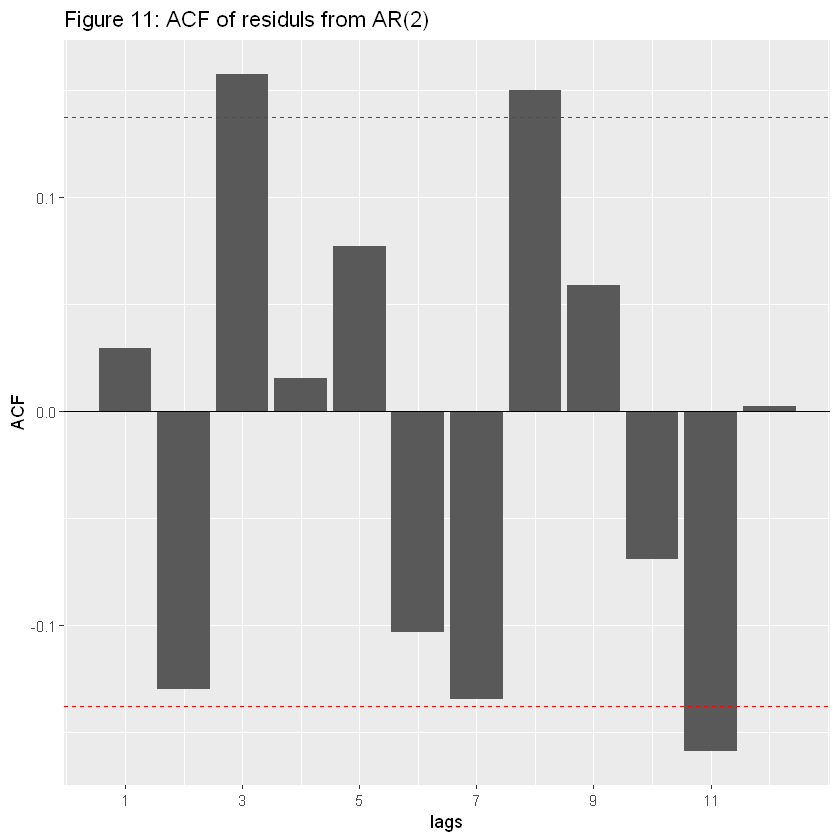

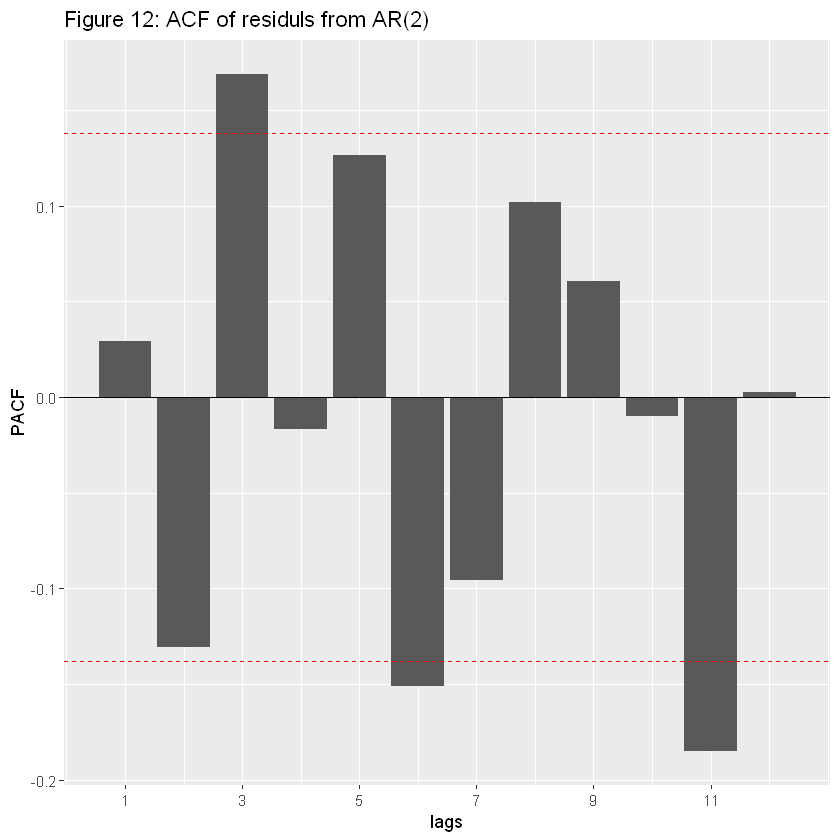

In [136]:
sacf.graph1(res_ar2,12)+ggtitle("Figure 11: ACF of residuls from AR(2)")
spacf.graph1(res_ar2,12)+ggtitle("Figure 12: ACF of residuls from AR(2)")

In [137]:
mar2$aic #AIC  for AR(2)

mar2$bic #SBC for AR(2)

[1] 296.4717

[1] 309.8791

-  Comparing AR(7) and AR(2) we can see that the AIC selects the AR(7) model, but SBC selects the AR(2) model. 

-  However, the residual autocorrelations from the AR(2) are
problematic.The Q-statistics from the AR(2) model indicate significant autocorrelation in the
residuals at the shorter lags. 
-  As such, AR(2) should be eliminated from further consideration.
 
### Fourth Model :AR(1,2,7)

If you examined the AR(7) carefully, you might have noticed that AR3 almost offsets
AR4 and that AR5 almost offsets A6 (since AR3 + AR4 =0 and AR5 + AR6=0). We can try another model by reestimatin the model without AR3.AR4,AR5,AR6.

In [138]:
mar127 <- Arima(sp,order=c(7,0,0),fixed=c(NA,NA,0,0,0,0,NA,NA))

# use fixed argument to restrict coef values to zero.

#Pvalues of ARIMA
p_mar127 <- (1-pnorm(abs(mar127$coef)/sqrt(diag(mar127$var.coef))))*1.96
### presenting the results with p values
df_mar127 <-as.matrix(rbind(mar127$coef[-(3:6)],p_mar127[-(3:6)]))

dimnames(df_mar127) = list(c("Coefficients","P Value"),c("AR1","AR2","AR7","mu"))

round(df_mar127,2)

,AR1,AR2,AR7,mu
Coefficients,1.03,-0.2,-0.03,1.2
P Value,0.00,0.0,0.41,0.0


-  The AR7 is now statistically insignificant, it might seem preferable to use the AR(2) instead. 
-  Yet, the AR(2) has been shown to be inadequate relative to the AR(7) and the AR(6) models.
 

In [139]:
#Ljung Box Q stat
res_ar127 <- mar127$residuals
Mjb <- matrix(nrow=2, ncol=12)
for(i in 1:12){
        jb <- Box.test(res_ar127, lag=i, type="Ljung-Box")
        round(Mjb[1,i] <- jb$statistic,2)
        round(Mjb[2,i] <- jb$p.value,2)
}

dimnames(Mjb) <- list(c("Q-stat","pval"))

round(Mjb,2)

Q-stat,0.19,4.39,8.41,8.42,9.45,12.47,15.35,22.18,23.68,24.27,28.68,28.79
pval,0.66,0.11,0.04,0.08,0.09,0.05,0.03,0.00,0.00,0.01,0.00,0.00


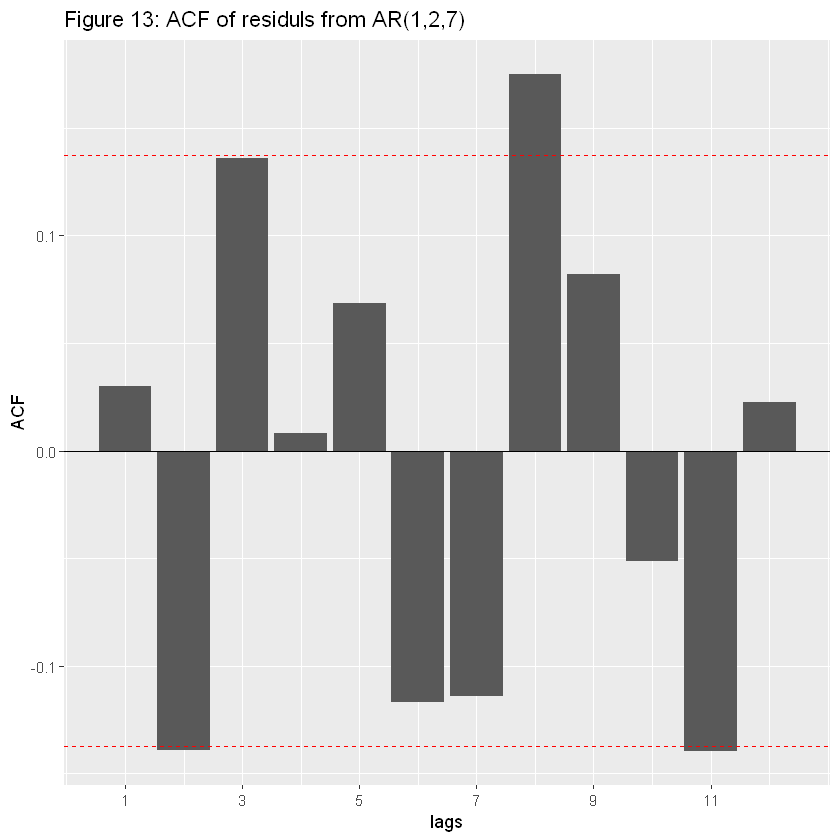

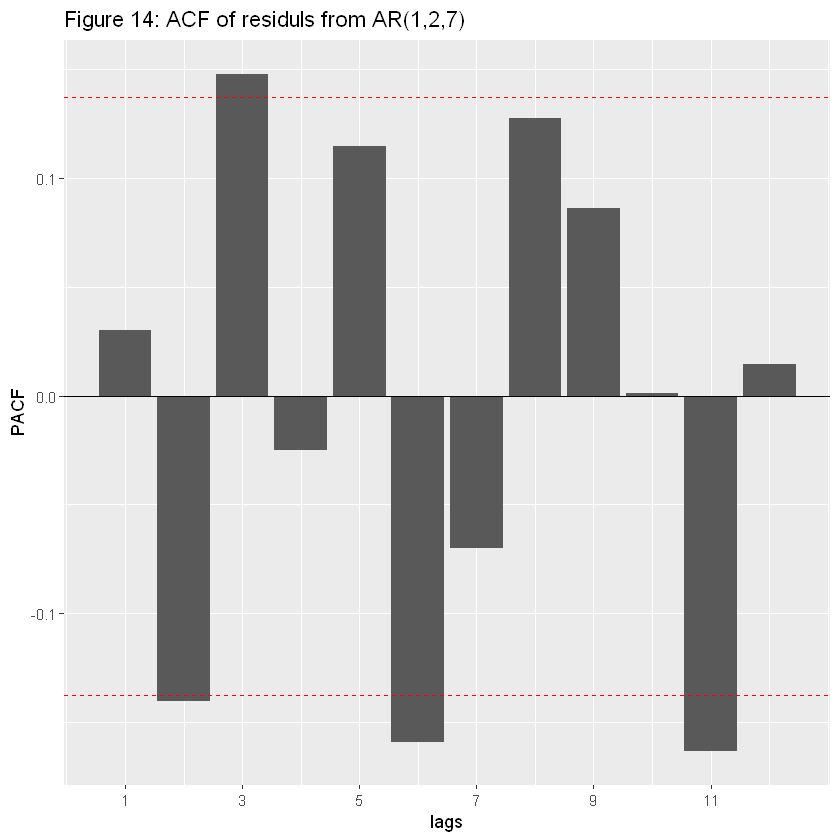

In [140]:
sacf.graph1(res_ar127,12)+ggtitle("Figure 13: ACF of residuls from AR(1,2,7)")
spacf.graph1(res_ar127,12)+ggtitle("Figure 14: ACF of residuls from AR(1,2,7)")

This model also exhibits autocorrelation  in residuals. (See the Q stat)


-  Even though the AR(6) and AR(7) models perform relatively well, they are not
necessarily the best forecasting models. 
-  There are several possible alternatives since the patterns of the ACF and PACF are not immediately clear.
-  As mentioned earlier the decaying nature of ACF and PACF can be taken as an indication of ARMA(1,1) Model.
 


### Fifth Model: ARMA(1,1)

In [141]:
sp11 <-window(sp,start=c(1961,3))

mar11 <- Arima(sp11,order=c(1,0,1)) 

#Pvalues of ARIMA
p_mar11 <- (1-pnorm(abs(mar11$coef)/sqrt(diag(mar11$var.coef))))*1.96
### presenting the results with p values
df_mar11 <-as.matrix(rbind(mar11$coef,p_mar11))

dimnames(df_mar11) = list(c("Coefficients","P Value"),c("AR1","MA1","mu"))



#Ljung Box Q stat
res_ar11 <- mar11$residuals
Mjb <- matrix(nrow=2, ncol=12)
for(i in 1:12){
        jb <- Box.test(res_ar11, lag=i, type="Ljung-Box")
        round(Mjb[1,i] <- jb$statistic,2)
        round(Mjb[2,i] <- jb$p.value,2)
}


dimnames(Mjb) <- list(c("Q-stat","pval"))
 round(df_mar11,2)
round(Mjb,2)

,AR1,MA1,mu
Coefficients,0.76,0.38,1.21
P Value,0.00,0.00,0.00


Q-stat,0.29,0.59,6.49,6.57,8.30,9.90,13.49,18.16,18.27,18.67,23.91,23.91
pval,0.59,0.74,0.09,0.16,0.14,0.13,0.06,0.02,0.03,0.04,0.01,0.02


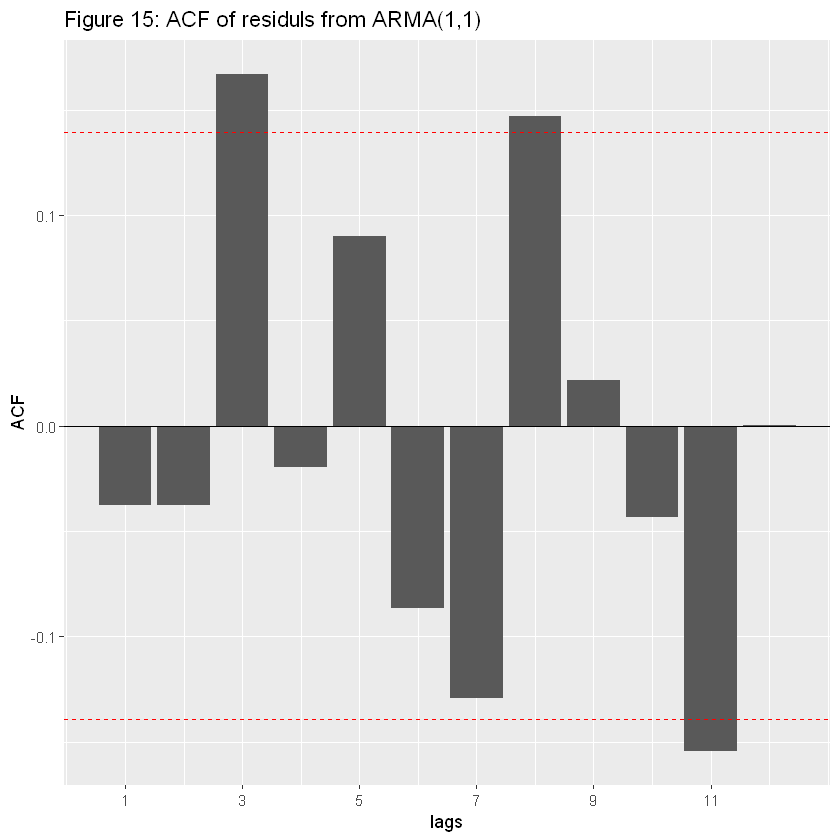

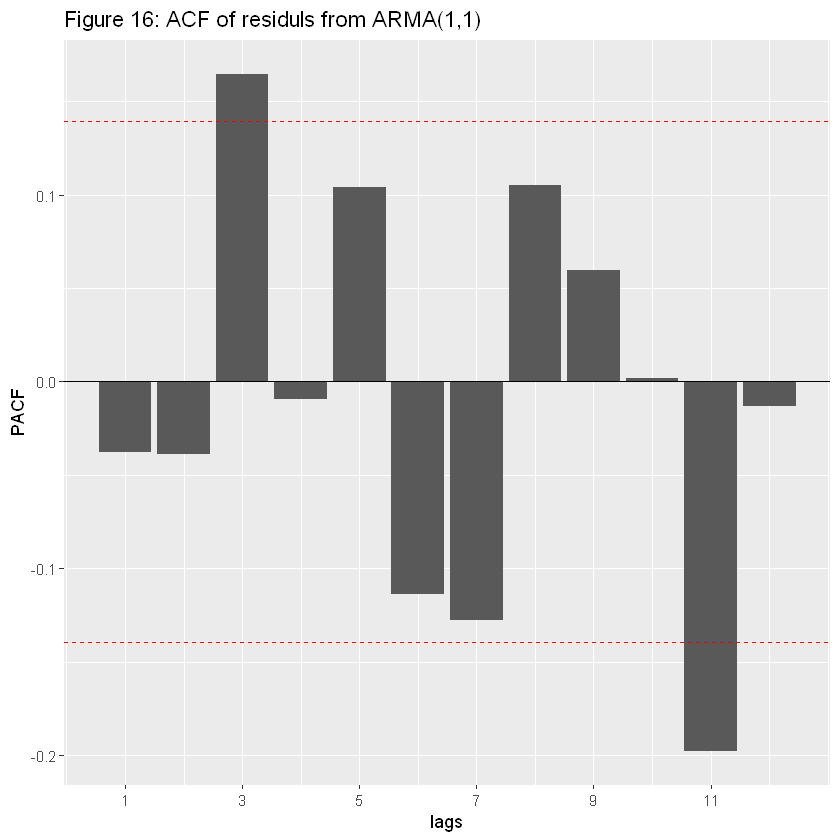

In [142]:
sacf.graph1(res_ar11,12)+ggtitle("Figure 15: ACF of residuls from ARMA(1,1)")
spacf.graph1(res_ar11,12)+ggtitle("Figure 16: ACF of residuls from ARMA(1,1)")

In [143]:
#AIC
mar11$aic

[1] 289.5957

In [144]:
#SBC
mar11$bic


[1] 302.9072

-  AR and MA coefficient are less than $|1|$ impaling a stationary invertible process.
-  The SBC from the ARMA(1, 1) is smaller than that of the AR(7) and the AR(6). 
-  Nevertheless,the ARMA(1, 1) specification is inadequate because of remaining serial
correlation in the residuals. The Ljung-Box Q-statistic  indicate that the residuals from this
model exhibit substantial serial autocorrelation. As such, we must eliminate
the ARMA(1, 1) model from consideration.
 

Since the ACF decays and the PACF seems to oscillate beginning with lag 2  it seems plausible to estimate an ARMA(2, 1) model.

### Sixth Attempt: ARMA(2,1)

In [145]:
sp21 <-window(sp,start=c(1961,2))

mar21 <- Arima(sp21,order=c(2,0,1)) 
#Pvalues of ARIMA
p_mar21 <- (1-pnorm(abs(mar21$coef)/sqrt(diag(mar21$var.coef))))*1.96
### presenting the results with p values
df_mar21 <-as.matrix(rbind(mar21$coef,p_mar21))

dimnames(df_mar21) = list(c("Coefficients","P Value"),c("AR1","AR2","MA1","mu"))

round(df_mar21, 2)

,AR1,AR2,MA1,mu
Coefficients,0.42,0.32,0.7,1.2
P Value,0.00,0.01,0.0,0.0


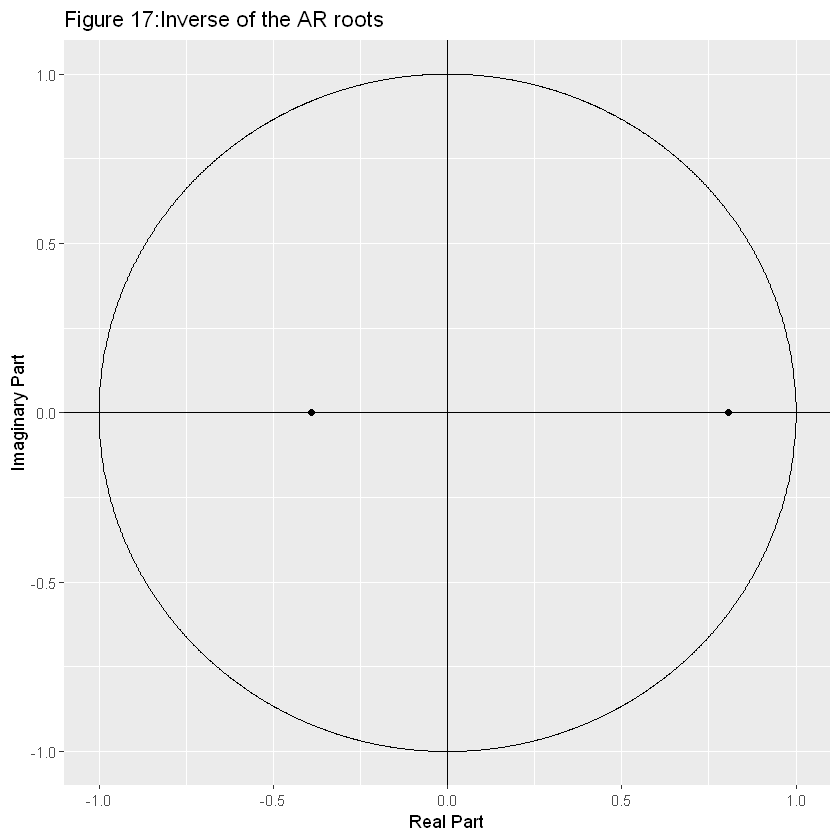

In [146]:
car21 <- mar21$coef[1:2]
rar21 <- (polyroot(c(1,-car21)))^{-1}

roots_arma(rar21)+ggtitle("Figure 17:Inverse of the AR roots")




The roots are within the unit circle and AR(2) satisfies the stability condition. The process is inverible as MA coefficient is less than one. 

In [147]:


#Ljung Box Q stat
res_ar21 <- mar21$residuals
Mjb <- matrix(nrow=2, ncol=12)
for(i in 1:12){
        jb <- Box.test(res_ar21, lag=i, type="Ljung-Box")
        round(Mjb[1,i] <- jb$statistic,2)
        round(Mjb[2,i] <- jb$p.value,2)
}

dimnames(Mjb) <- list(c("Q-stat","pval"))
round(Mjb,2)

Q-stat,0.00,0.05,1.09,1.22,1.42,2.96,7.36,12.04,12.08,12.28,18.72,18.72
pval,0.99,0.97,0.78,0.87,0.92,0.81,0.39,0.15,0.21,0.27,0.07,0.10


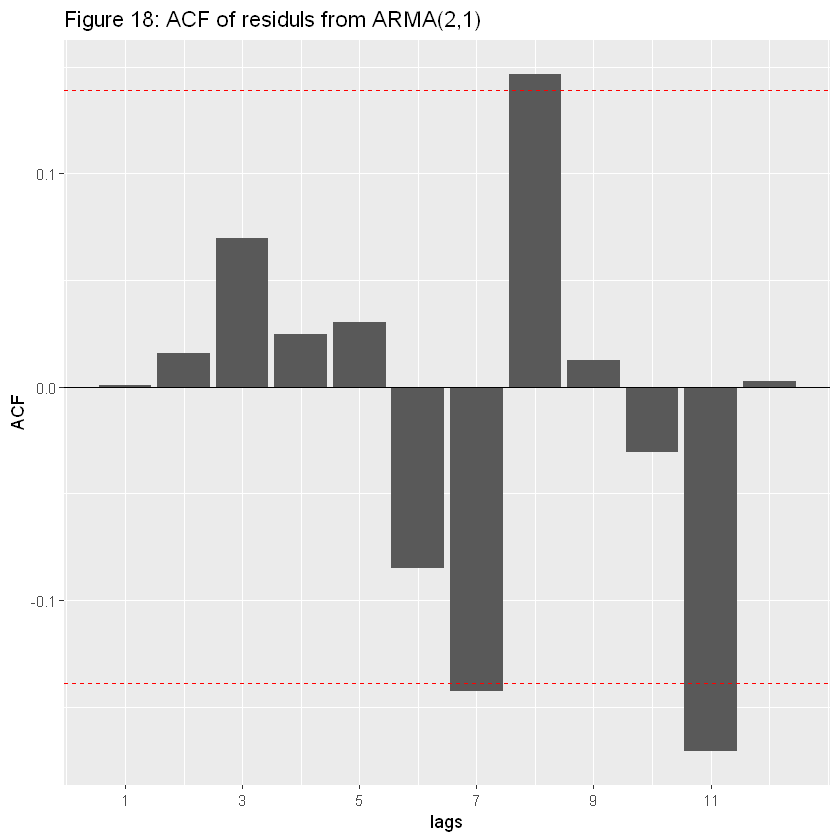

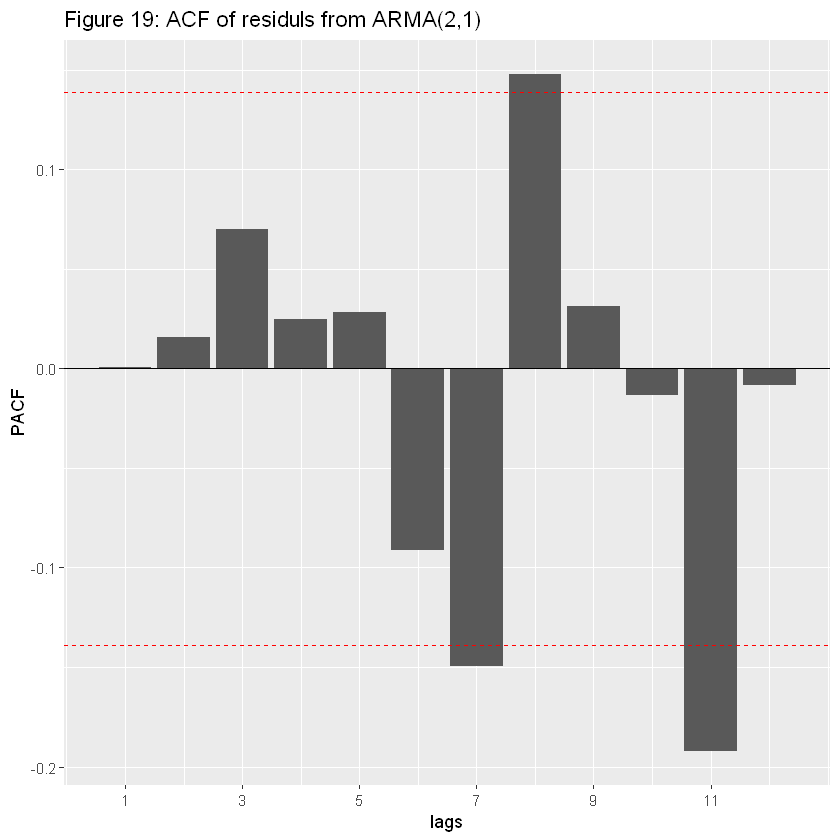

In [148]:
sacf.graph1(res_ar21,12)+ggtitle("Figure 18: ACF of residuls from ARMA(2,1)")
spacf.graph1(res_ar21,12)+ggtitle("Figure 19: ACF of residuls from ARMA(2,1)")

In [149]:
mar21$aic #AIC
mar21$bic #SBC

[1] 287.1041

[1] 303.7677

-  This model is an improvement over the ARMA(1, 1) specification. 
-  All the coefficients are statistical significant.
-  The AIC selects the ARMA(2, 1) model over that AR(6) and the SBC selects the ARMA(2, 1) over the AR(6)
and the AR(7). 
-  The values for Q stat indicate that the autocorrelations
of the residuals are not statistically significant at the 5% level.
 

### Seventh Model :ARMA(2,(1,7))

In order to account for the serial correlation at lag 7, it might seem plausible
to add an MA term to the model at lag 7

In [150]:

mar27 <- Arima(sp,order=c(2,0,7),fixed=c(NA,NA,NA,0,0,0,0,0,NA,NA)) 
#Pvalues of ARIMA
p_mar27 <- (1-pnorm(abs(mar27$coef)/sqrt(diag(mar27$var.coef))))*1.96
### presenting the results with p values
df_mar27 <-as.matrix(rbind(mar27$coef[-(4:8)],p_mar27[-(4:8)]))

dimnames(df_mar27) = list(c("Coefficients","P Value"),c("AR1","AR2","MA1","MA7","mu"))


#Ljung Box Q stat
res_ar27 <- mar27$residuals
Mjb <- matrix(nrow=2, ncol=12)
for(i in 1:12){
        jb <- Box.test(res_ar27, lag=i, type="Ljung-Box")
        round(Mjb[1,i] <- jb$statistic,2)
        round(Mjb[2,i] <- jb$p.value,2)
}

dimnames(Mjb) <- list(c("Q-stat","pval"))
 round(df_mar27,2)
round(Mjb,2)

,AR1,AR2,MA1,MA7,mu
Coefficients,0.34,0.4,0.78,-0.14,1.19
P Value,0.01,0.0,0.00,0.00,0.00


Q-stat,0.01,0.18,0.58,0.83,0.83,2.06,2.34,2.80,4.71,6.51,11.08,11.24
pval,0.93,0.91,0.90,0.93,0.97,0.91,0.94,0.95,0.86,0.77,0.44,0.51


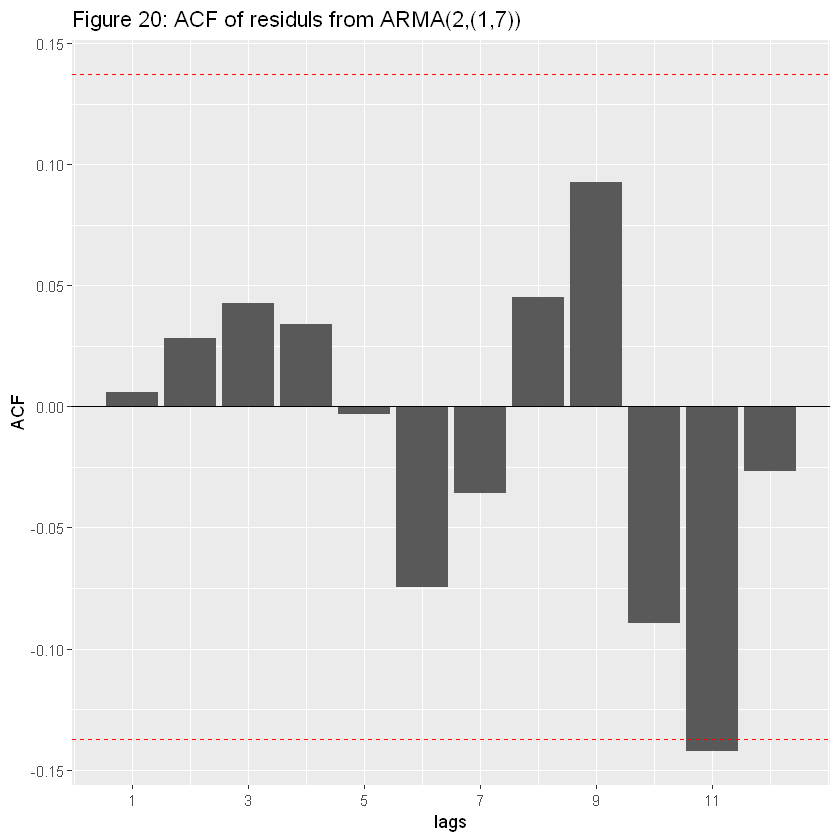

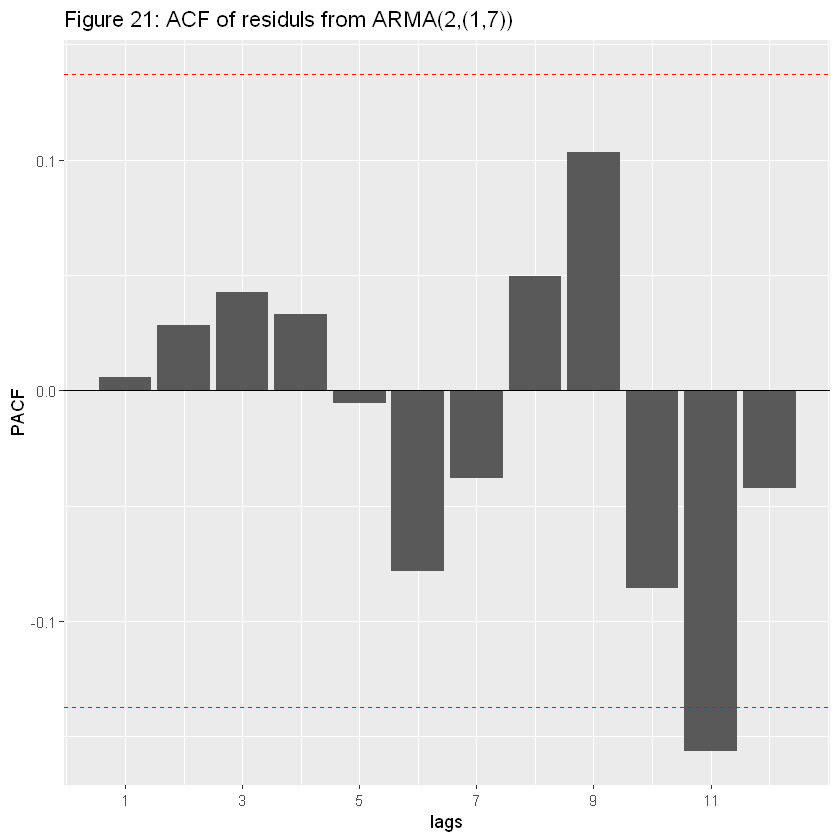

In [151]:
sacf.graph1(res_ar27,12)+ggtitle("Figure 20: ACF of residuls from ARMA(2,(1,7))")
spacf.graph1(res_ar27,12)+ggtitle("Figure 21: ACF of residuls from ARMA(2,(1,7))")

-   All of the estimated coefficients are of high quality. 
-  The Q-statistics indicate that the autocorrelations of the residuals are not significant at conventional
level. 
-  Both the AIC and SBC select the ARMA[2,(1,7)] specification over any of the other models.
-   Although the ARMA[2,(1,7)] model appears to be quite reasonable, other
researchers might have selected a decidedly different model. 
 

Consider some of the alternatives listed below.

-  Parsimony versus Overfitting: Some researcher prefer small models like ARMA(2,1) in this example. Also try to see the significance of particular coefficient to the problem at hand For instance in this case, is it really plausible MA7 has a direct effect on the current value of the interest rate spread
while lags 3, 4, 5, and 6 have no direct effects? In other words, do the markets
for securities work in such a way that what happens 7 quarters in the past has a
larger effect on today's' interest rates than events occurring in the more recent
past? Even though the AIC and SBC select the ARMA[2,(1,7)]
model over the ARMA(2, 1) model, some researchers would prefer the latter.
More generally, overfitting refers to a situation in which an equation
is fit to some of the idiosyncrasies of present in a particular sample that are
not actually representative of the data-generating process. In applied work,
no data set will perfectly correspond to every assumption required for the
Box-Jenkins methodology. Since it is not always clear which characteristics
of the sample are actually present in the data-generating process, the attempt
to expand a model so as to capture every feature of the data may lead to
overfitting.
-  Volatility: Given the volatility of the spread series during the late 1970s and
early 1980s, transforming the spread using some sort of a square root or logarithmic
transformation might be appropriate. Moreover, the  series has a
number of sharp jumps, indicating that the assumption of normality might be
violated. Possibility of heteroschedasticity in Variance
-  Incorporation of trends 

### Forcasting


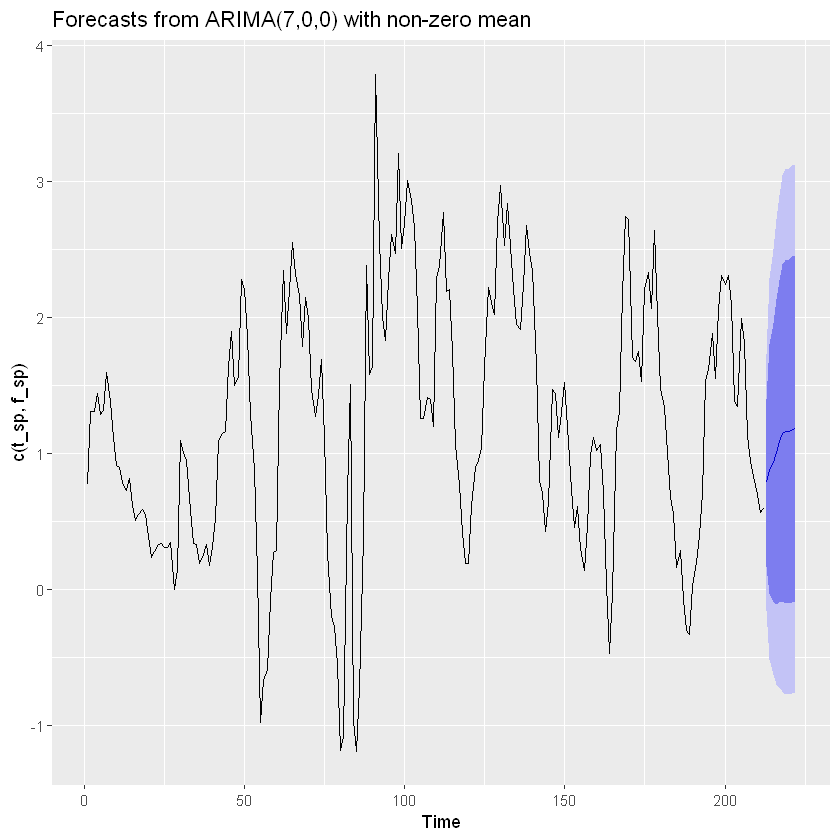

In [152]:
# we split the sample into two. First sample is used to fit the model.
# we will use the second sample for forecast evaluation.
 
t_sp <- window(sp,start=c(1960,1),end=c(2000,2))
f_sp<-window(sp,start=c(2000,3))

# Estimate two models
mod1<-Arima(t_sp,order=c(7,0,0))
mod2<-Arima(t_sp,order=c(2,0,7),fixed=c(NA,NA,NA,0,0,0,0,0,NA,NA))
# We need to obtain one step ahead forecast manualy
#Followings codes will do that
 # Model 1
newfit7 <- Arima(c(t_sp,f_sp), model=mod1)
fmod1 <- fitted(newfit7)[163:212]
autoplot(forecast(newfit7)) # graph of forcasted value

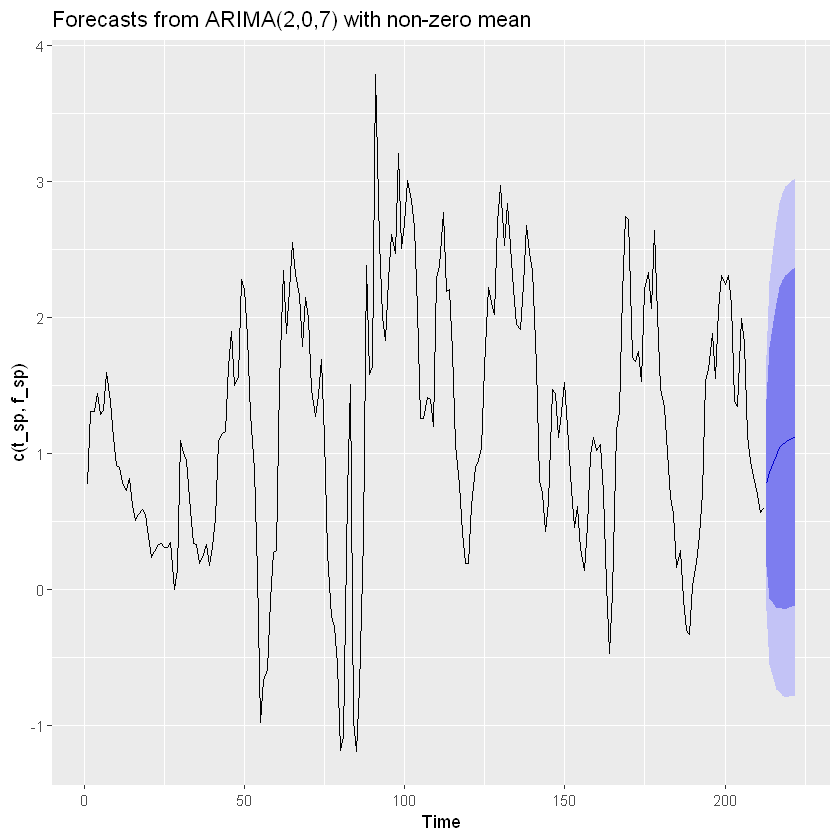

In [153]:
# Model 2
newfit27 <- Arima(c(t_sp,f_sp), model=mod2)
fmod2 <- fitted(newfit27)[163:212]
autoplot(forecast(newfit27))

In [154]:
e1t <- f_sp[-50]-fmod1[-1]
e2t <- f_sp-fmod2
# out of sample forecast evaluation 
round(accuracy(fmod1, f_sp),2) # for AR(7)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.02,0.42,0.33,-25.5,132.96,-0.02,0.76


In [155]:
round(accuracy(fmod2, f_sp),2)#arma(2,(1,7))
################################################################################

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.02,0.4,0.31,-29.04,126.25,0.05,0.69
